In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


class DemographicPlotter:
    def __init__(self, file_path):
        # Load the dataset
        self.data = pd.read_csv(file_path, sep='\t')
        # Replace spaces in column names with underscores for consistency
        self.data.columns = [col.replace('.', ' ') for col in self.data.columns]
    def preprocess_column(self, data, col):
        if col not in data.columns:
            raise ValueError(f"Column {col} not found in the dataset!")
        data = data.dropna(subset=[col])
        data = data[data[col].str.strip() != '']
        data[col] = data[col].str.replace(r'\s+', ' ', regex=True)
        data[col] = data[col].apply(lambda x: 'Mixed Ashkenazi' if '/' in x else x)
        return data
    def generate_study_tables(self, studies):
        
        """
        Generate tables and bar charts showing the unique groups and their tallies for 'Specifc Region', Refined_Region, and Jew_or_NonJewish.
        :param studies: A string ("all") or a list of study names to filter the data.
        """
        if isinstance(studies, str):
            if studies.lower() == "all":
                # Process all studies
                print("Table for all studies:")
                self._print_tallies(self.data)
                self._generate_bar_charts(self.data, "All Studies")
            else:
                # Process a single study
                study_data = self.data[self.data['Publication'].str.contains(studies, case=False, na=False)]
                if study_data.empty:
                    print(f"No data found for study: {studies}")
                else:
                    print(f"Table for study: {studies}")
                    self._print_tallies(study_data)
                    self._generate_bar_charts(study_data, studies)
        elif isinstance(studies, list):
            # Process multiple studies
            for study in studies:
                study_data = self.data[self.data['Publication'].str.contains(study, case=False, na=False)]
                if study_data.empty:
                    print(f"No data found for study: {study}")
                else:
                    print(f"Table for study: {study}")
                    self._print_tallies(study_data)
                    self._generate_bar_charts(study_data, study)
        else:
            raise ValueError("Invalid input for 'studies'. Expected a string or a list of strings.")

    def _print_tallies(self, data):
        """
        Helper function to print the tallies for 'Specifc Region', Refined_Region, and Jew_or_NonJewish.
        :param data: The filtered dataset to analyze.
        """
        # Aggregate data for 'Specifc Region', Refined_Region, and Jew_or_NonJewish
        Specifc_Region_counts = data['Specifc Region'].value_counts().reset_index()
        Specifc_Region_counts.columns = ['Specifc Region', 'Count']
        refined_region_counts = data['Refined Region'].value_counts().reset_index()
        refined_region_counts.columns = ['Refined Region', 'Count']
        Specifc_Region_counts.loc['Total'] = ['Total', Specifc_Region_counts['Count'].sum()]
        refined_region_counts.loc['Total'] = ['Total', refined_region_counts['Count'].sum()]
        pd.set_option('display.max_rows', None)  # Show all rows
        pd.set_option('display.max_columns', None)  # Show all columns
        pd.set_option('display.width', None)  # Auto-detect the display width
        pd.set_option('display.max_colwidth', None)  # Show full content of each cell

        # Print the tallies
        print("\nSpecifc_Region Tally:")
        print(Specifc_Region_counts)
        print("\nRefined_Region Tally:")
        print(refined_region_counts)
        print("\n" + "=" * 50 + "\n")  # Separator for readability

    def _generate_bar_charts(self, data, study_name):
        preprocess = True
        """
        Helper function to generate bar charts for Specific_Region, Refined_Region, and Jewish_or_nonjewish.
        :param data: The filtered dataset to visualize.
        :param study_name: The name of the study (used in the chart title).
        """


        # Generate bar chart for Refined_Region
        refined_region_counts = data['Refined Region'].value_counts().reset_index()
        refined_region_counts.columns = ['Refined Region', 'Count']  # Rename columns
        plt.figure(figsize=(20, 16))
        sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')
        plt.title(f"Refined_Region Distribution for {study_name}")
        plt.xlabel("Count")
        plt.ylabel("Refined Region")
        plt.tight_layout()
        plt.show()

        # Generate bar chart for Jewish_or_nonjewish
        jewish_nonjewish_counts = data['Jew or NonJewish'].value_counts().reset_index()
        jewish_nonjewish_counts.columns = ['Jew or NonJewish', 'Count']  # Rename columns
        plt.figure(figsize=(14, 10))
        sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')
        plt.title(f"Jewish or Non Jewish Distribution for {study_name}")
        plt.xlabel("Count")
        plt.ylabel("Jewish or Non Jewish")
        plt.tight_layout()
        plt.show()
    def plot_all_columns(self):
            preprocess = True
            self._generate_bar_charts(self.data)

plotter = DemographicPlotter("/home/belleza/projects/def-cbherer/shared/jewish_reference_genomes/meta_jew_1kg_HGDP.txt")





# THE BEGINNING OF YOUR META FILE BEGAN WITH 
# In Search of the jüdische Typus: A Proposed Benchmark to Test the Genetic Basis of Jewishness Challenges Notions of “Jewish Biomarkers”
# *Eran Elhaik*


Bray - Manual

TAGC - Manual


# THE BEGINNING OF YOUR META FILE BEGAN WITH 
# In Search of the jüdische Typus: A Proposed Benchmark to Test the Genetic Basis of Jewishness Challenges Notions of “Jewish Biomarkers”
# *Eran Elhaik* 
- https://pmc.ncbi.nlm.nih.gov/articles/instance/4974603/bin/Data_Sheet_1.DOCX

---

- Excluding information from the HGDP -- the information from table S1 was manually inputted into a txt and constituted the intial scaffolding of the meta file
    - This contained the information for Behar et al., 2010, Behar et al., 2013, and Lazaridis et al.2014 (Only Jewish Individuals in Lazaridis et al.2014 were retained).
- An additional column was made designating individuals as Jewish/Non_Jewish
- Population was renamed to 'Original_Description'
- For Jewish groups an additional column for Heritage community (e.g., Ashkenazi, Sephardic, Mizrahi) to for future colouring schemes. In this column, non jewish groups were either copied or if additional specificity was provided (e.g., Italian vs. Sicillian), that was inputted
- Manually cumulate Table S3 into the txt file to assign the Jewish individuals from this intial list their original publications
- Non-Jewish individuals were manually assigned their original publication through individual verification. 


Table for study: Behar.et.al.2010

Specifc_Region Tally:
                Specifc Region  Count
0                      Iranian     20
1                        Saudi     20
2                    Hungarian     20
3                    Jordanian     20
4                     Georgian     20
5                     Armenian     19
6                      Chuvash     17
7                       Syrian     16
8                     Romanian     16
9                      Turkish     16
10                      Lezgin     13
11               Ethiopian.Jew     13
12                     Cypriot     12
13                    Egyptian     12
14                     Spanish     12
15                  Lithuanian     10
16                      Yemeni     10
17                   Iraqi.Jew     10
18                 Turkish.Jew     10
19                    Moroccan     10
20                  Belarusian      9
21                   Karnataka      9
22               Bulgarian.Jew      8
23             Azerbaijani.Jew 

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


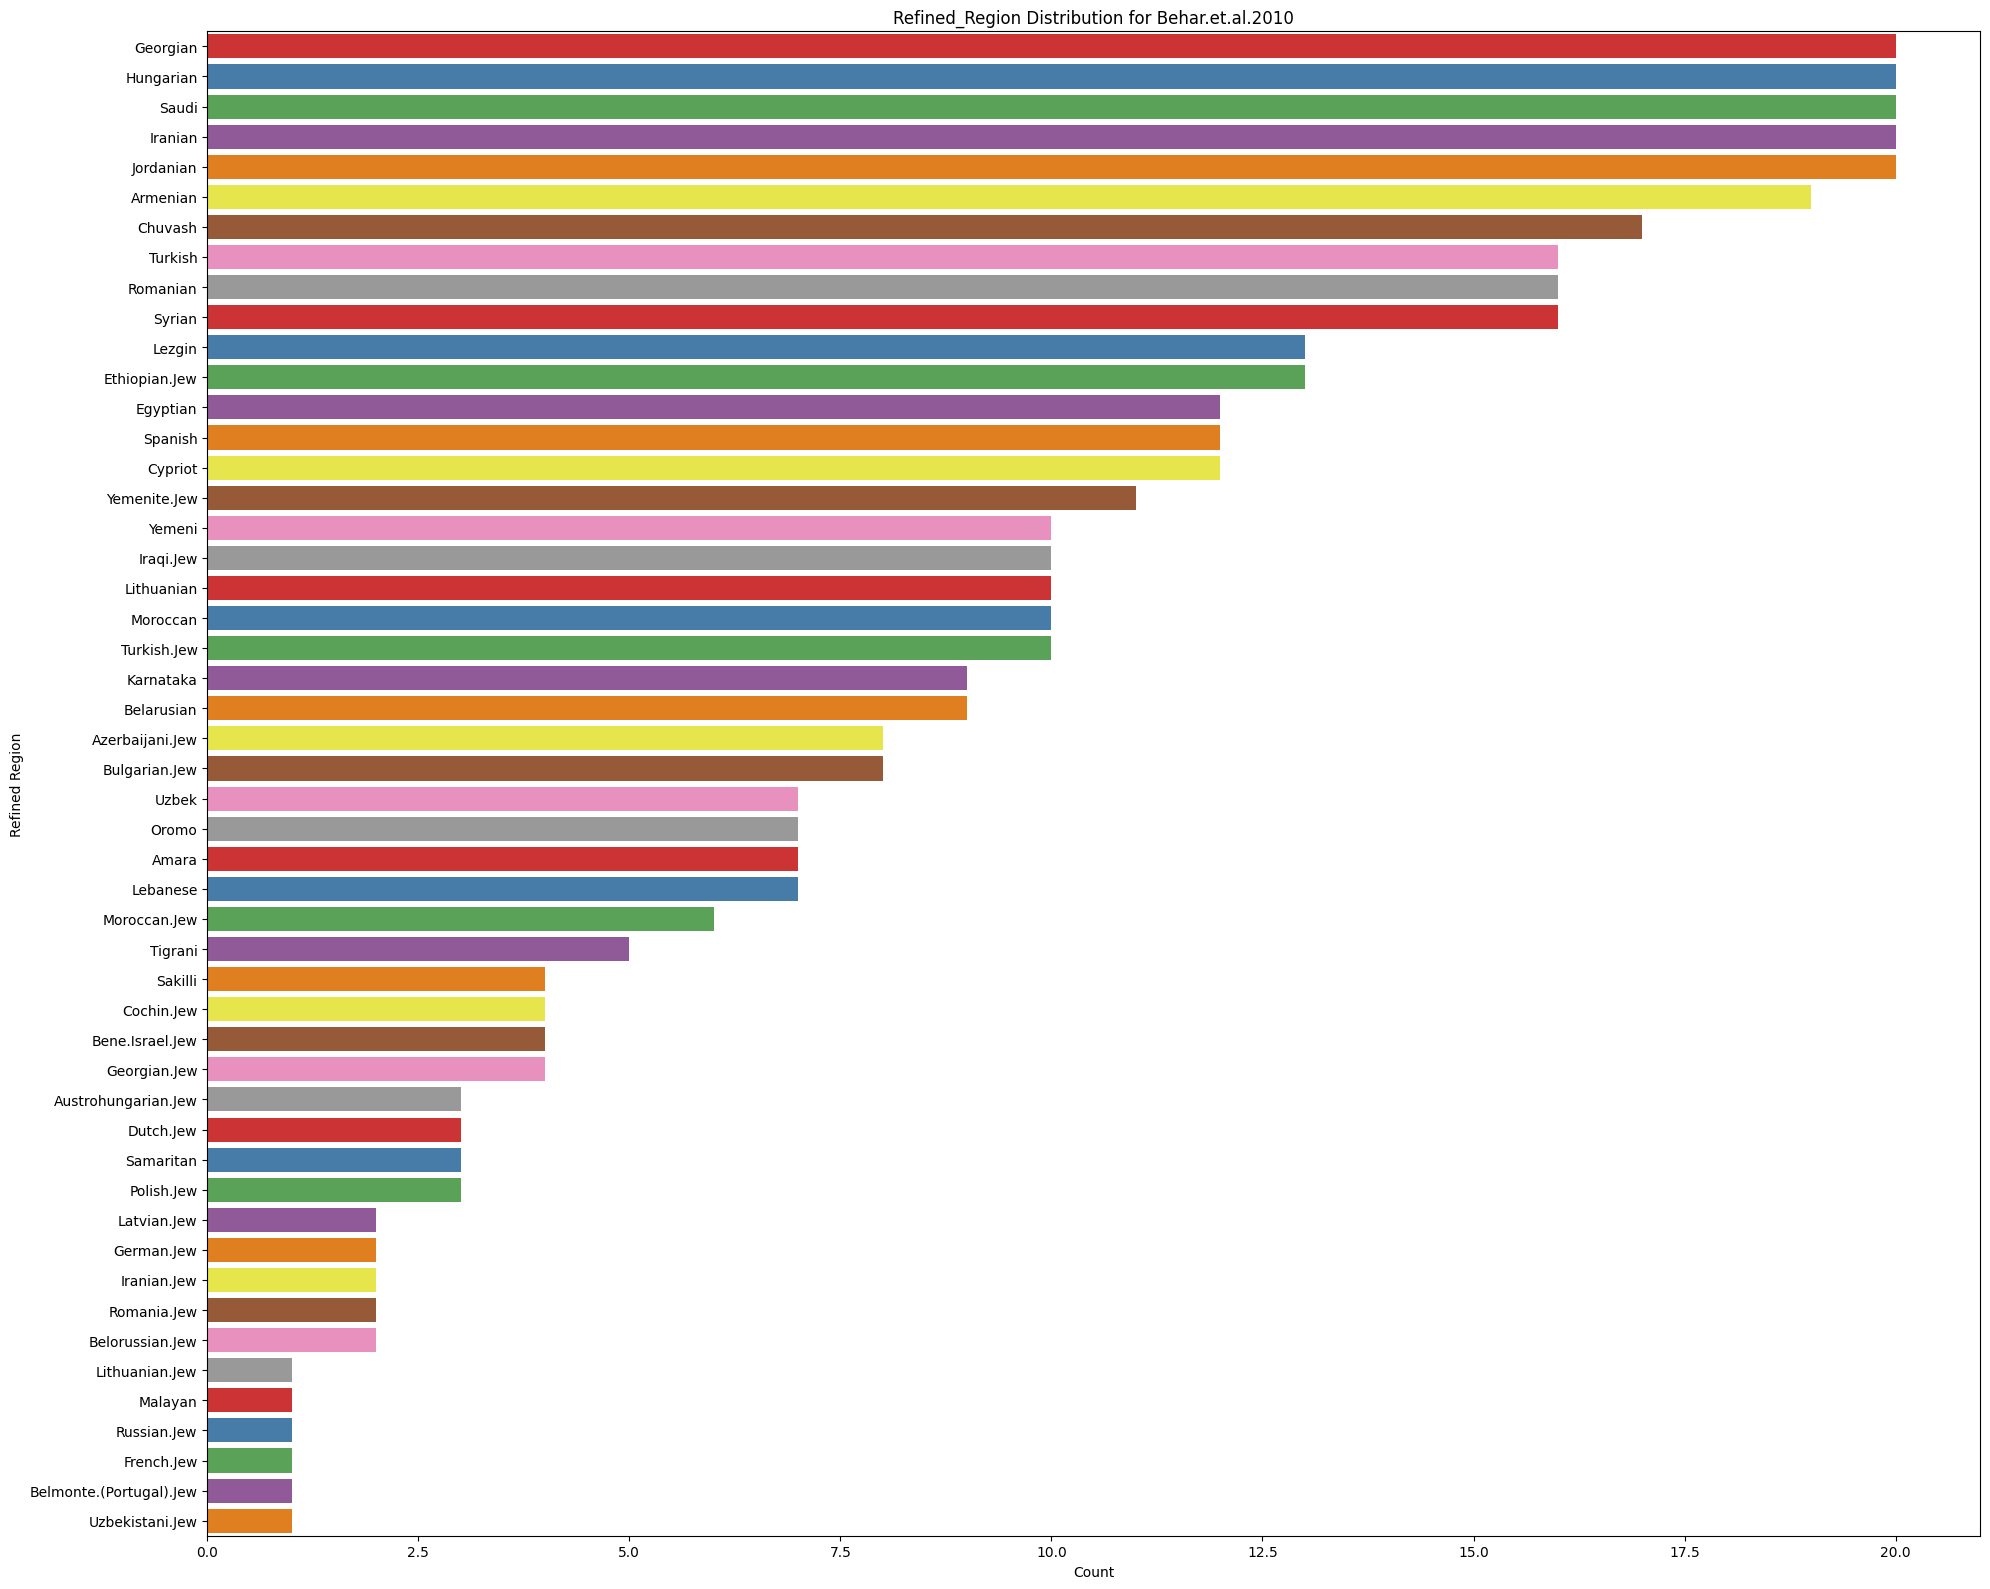

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


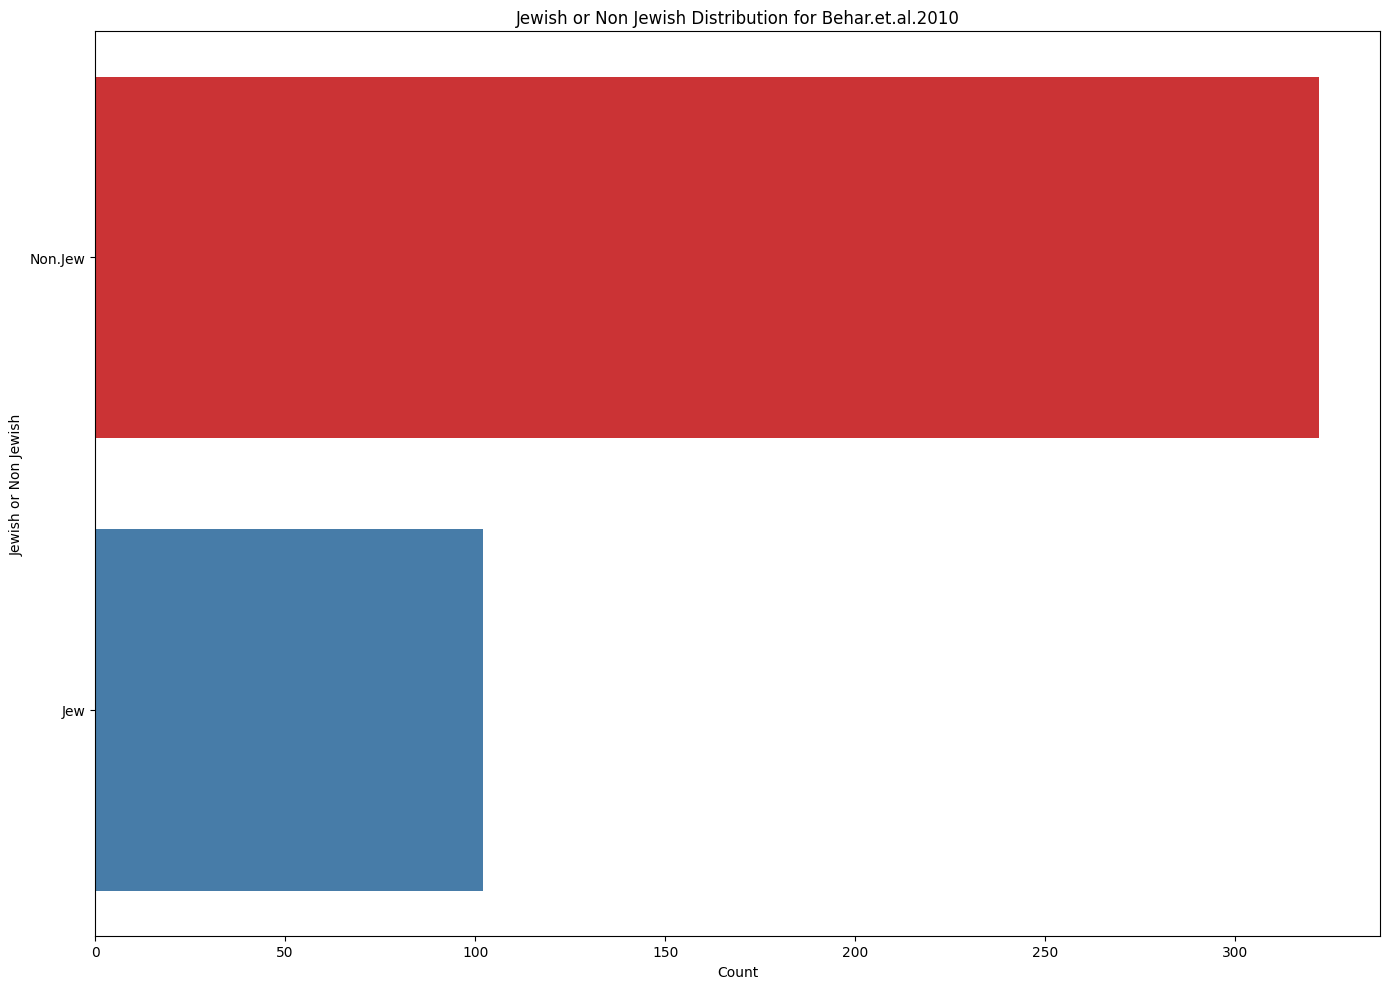

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


Table for study: Behar.et.al..2013

Specifc_Region Tally:
        Specifc Region  Count
0              Russian     23
1                Tatar     20
2              Swedish     18
3               Polish     17
4          Azerbaijani     16
5              Croatia     13
6         Bosnia.Croat     11
7              Italian     11
8             Georgian     10
9          Italian.Jew     10
10         Kurdish.Jew     10
11      Central.Greece     10
12            Thessaly     10
13          Belarusian      8
14         Iranian.Jew      8
15             Turkmen      8
16         West.Sicily      8
17           Moldavian      7
18          French.Jew      7
19         Palestinian      6
20          Libyan.Jew      6
21        Tunisian.Jew      6
22        Algerian.Jew      5
23              Balkar      3
24           Iraqi.Jew      3
25           Abkhasian      3
26        Yemenite.Jew      3
27     Azerbaijani.Jew      3
28        Georgian.Jew      3
29               Druze      3
30        Mo

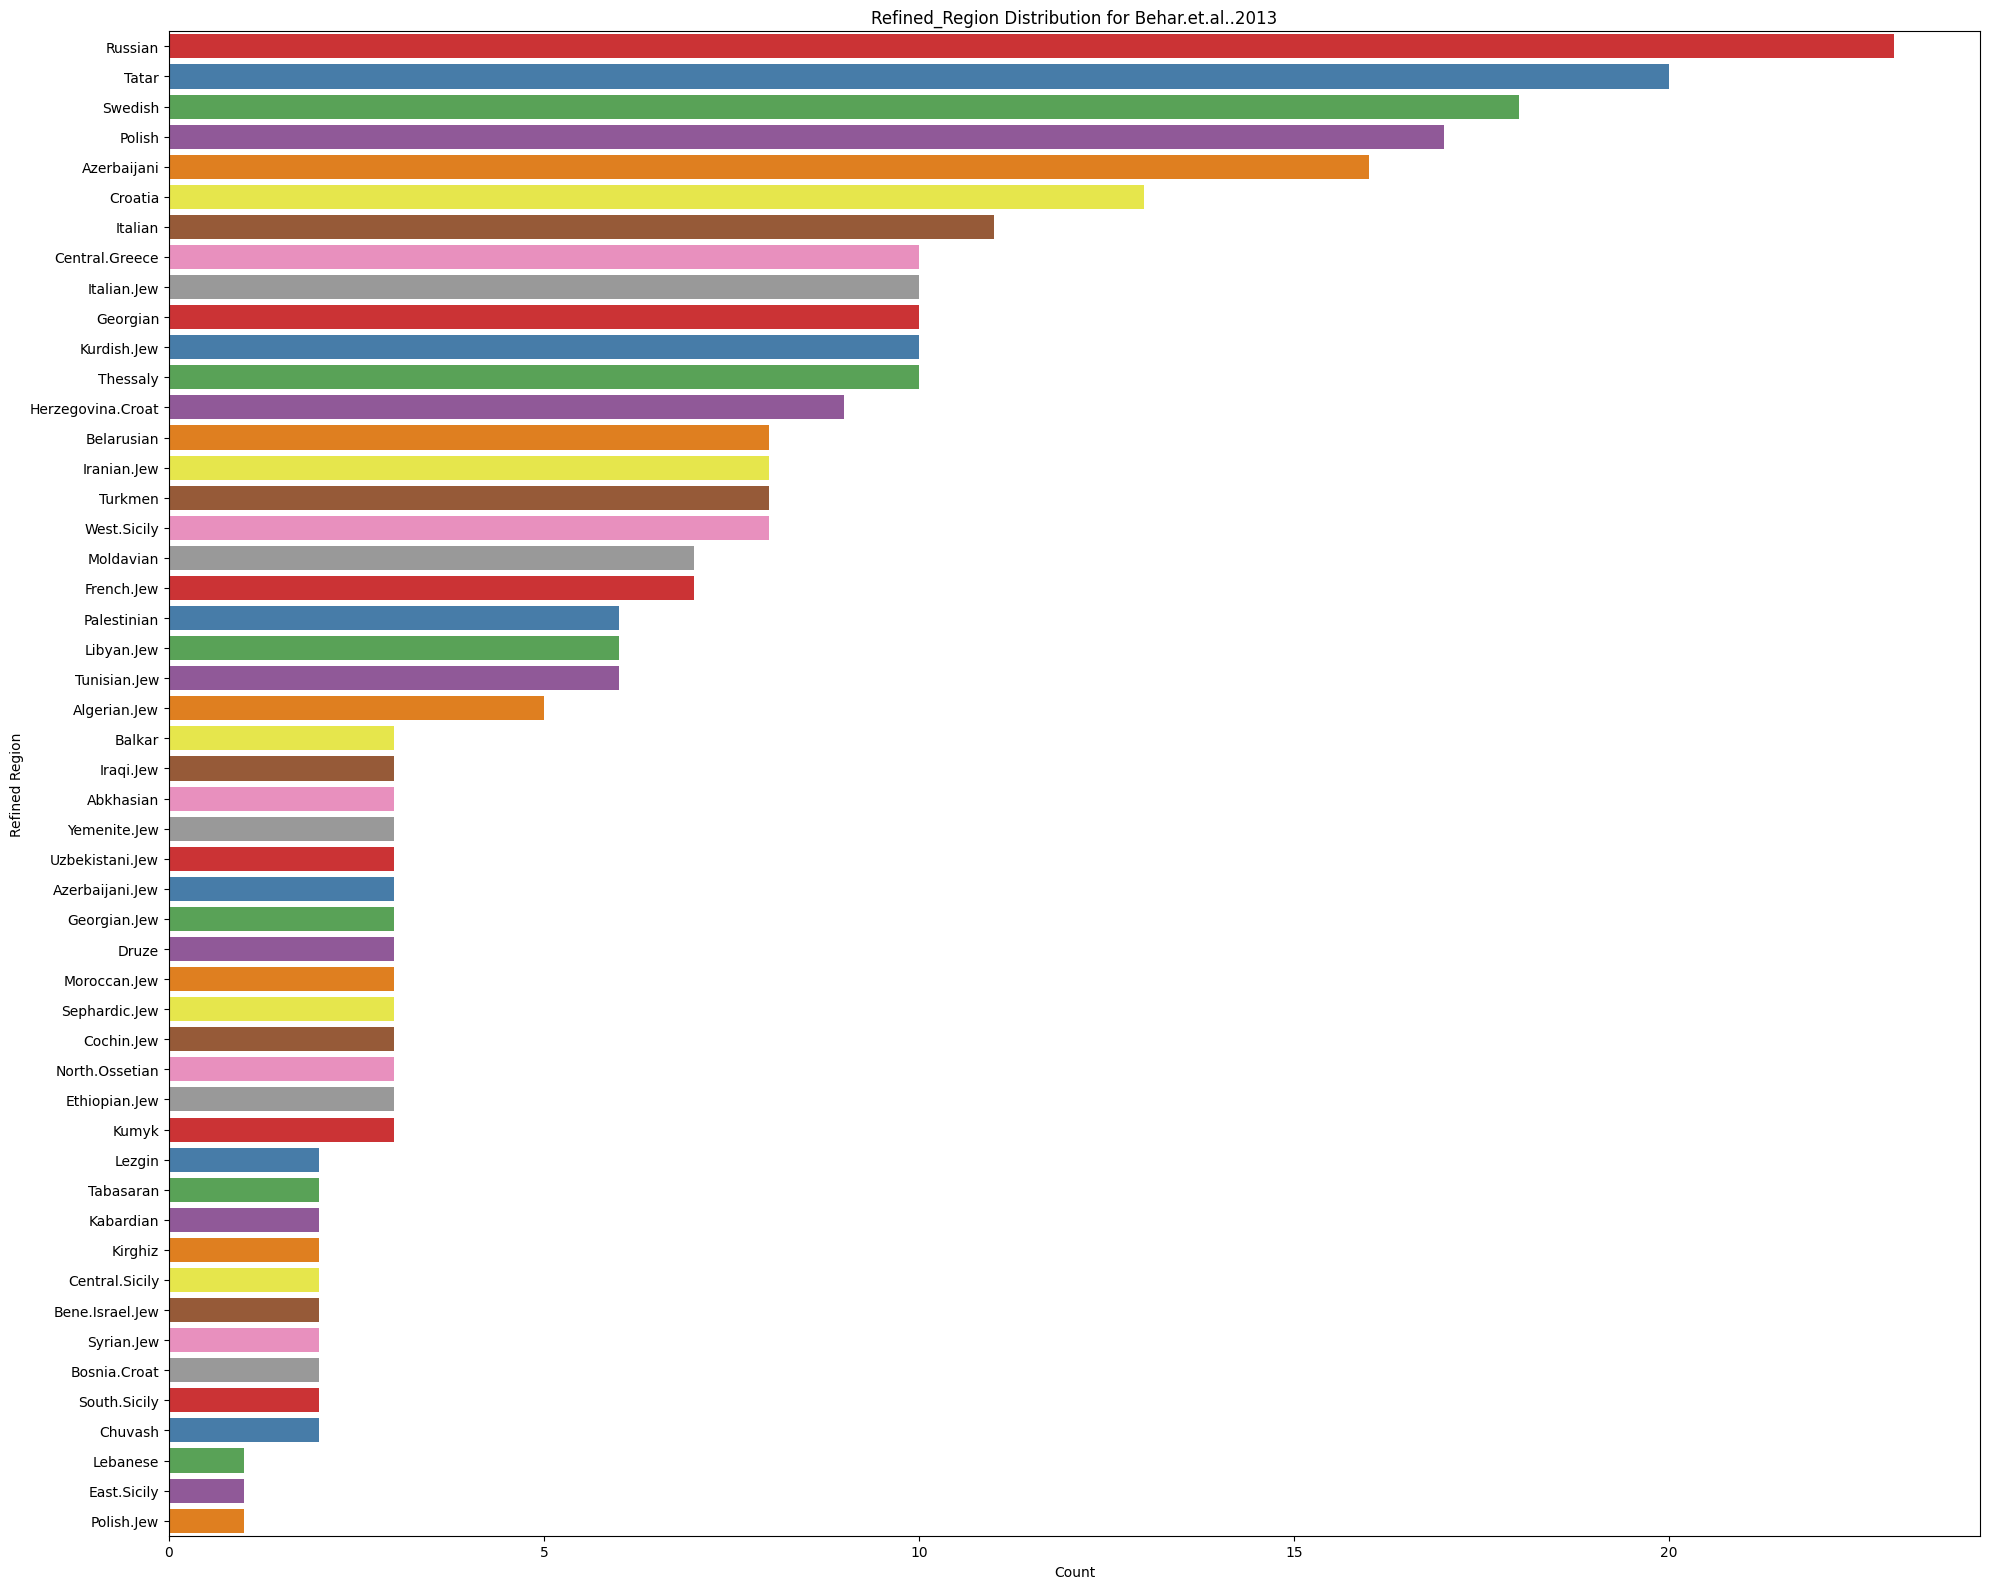

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


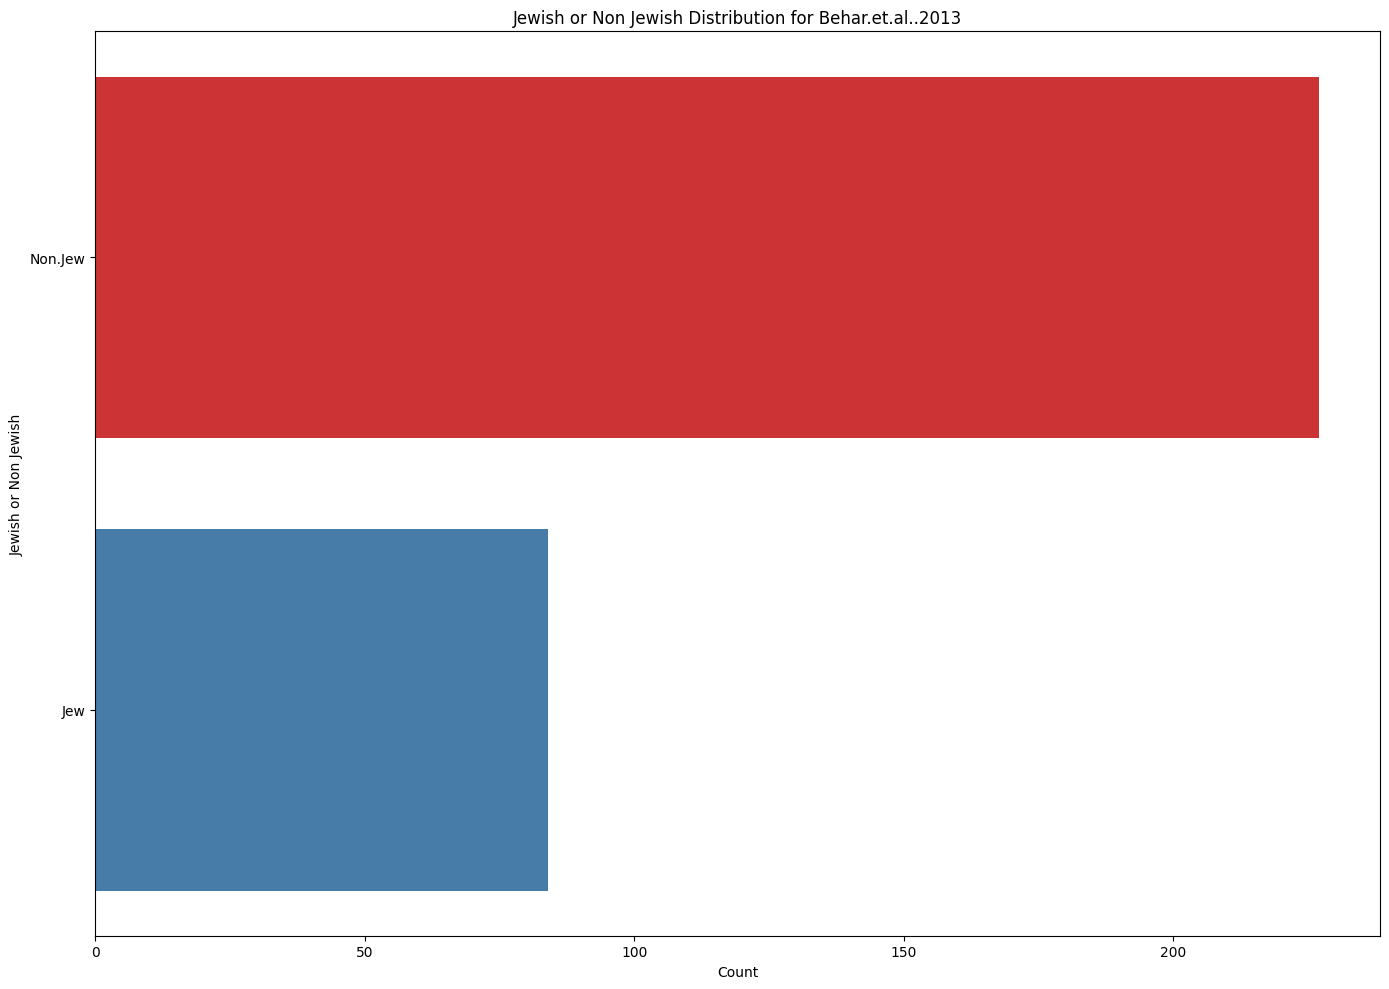

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


Table for study: Lazaridis.et.al..2014

Specifc_Region Tally:
      Specifc Region  Count
0       Yemenite.Jew     10
1          Iraqi.Jew     10
2         Libyan.Jew      9
3        Turkish.Jew      9
4        Iranian.Jew      9
5       Georgian.Jew      9
6         Polish.Jew      7
7       Tunisian.Jew      7
8      Ethiopian.Jew      6
9       Moroccan.Jew      6
10     Ashkenazi.Jew      2
11        Cochin.Jew      2
Total          Total     86

Refined_Region Tally:
      Refined Region  Count
0       Yemenite.Jew     10
1          Iraqi.Jew     10
2         Libyan.Jew      9
3        Turkish.Jew      9
4        Iranian.Jew      9
5       Georgian.Jew      9
6         Polish.Jew      7
7       Tunisian.Jew      7
8      Ethiopian.Jew      6
9       Moroccan.Jew      6
10     Ashkenazi.Jew      2
11        Cochin.Jew      2
Total          Total     86




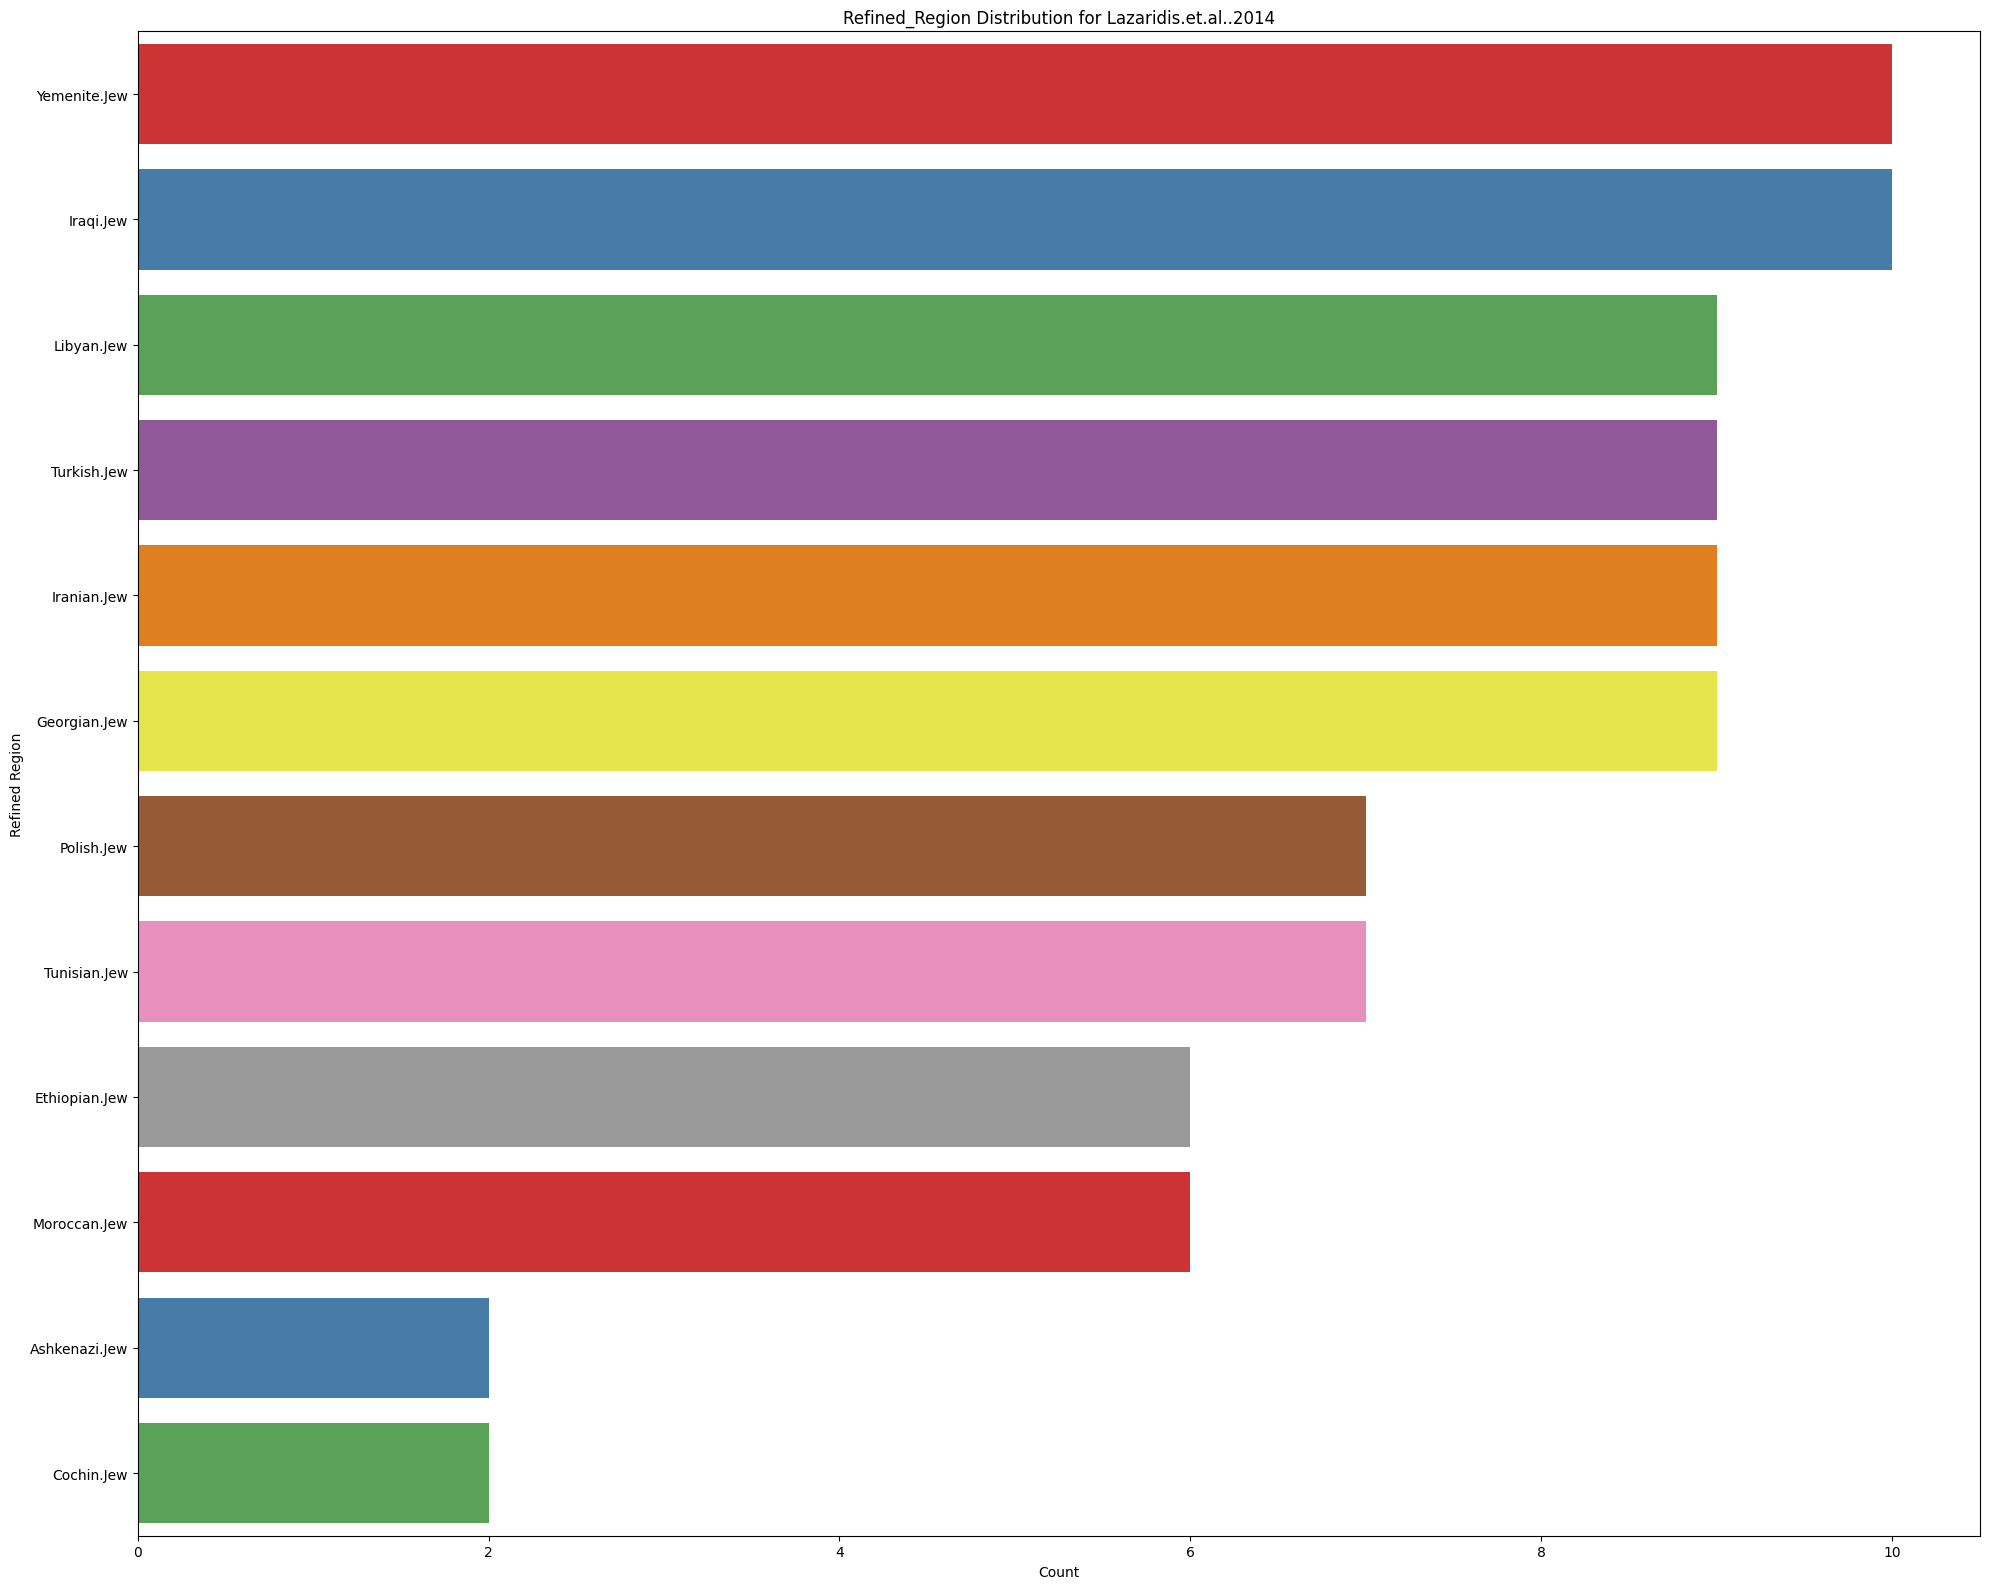

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


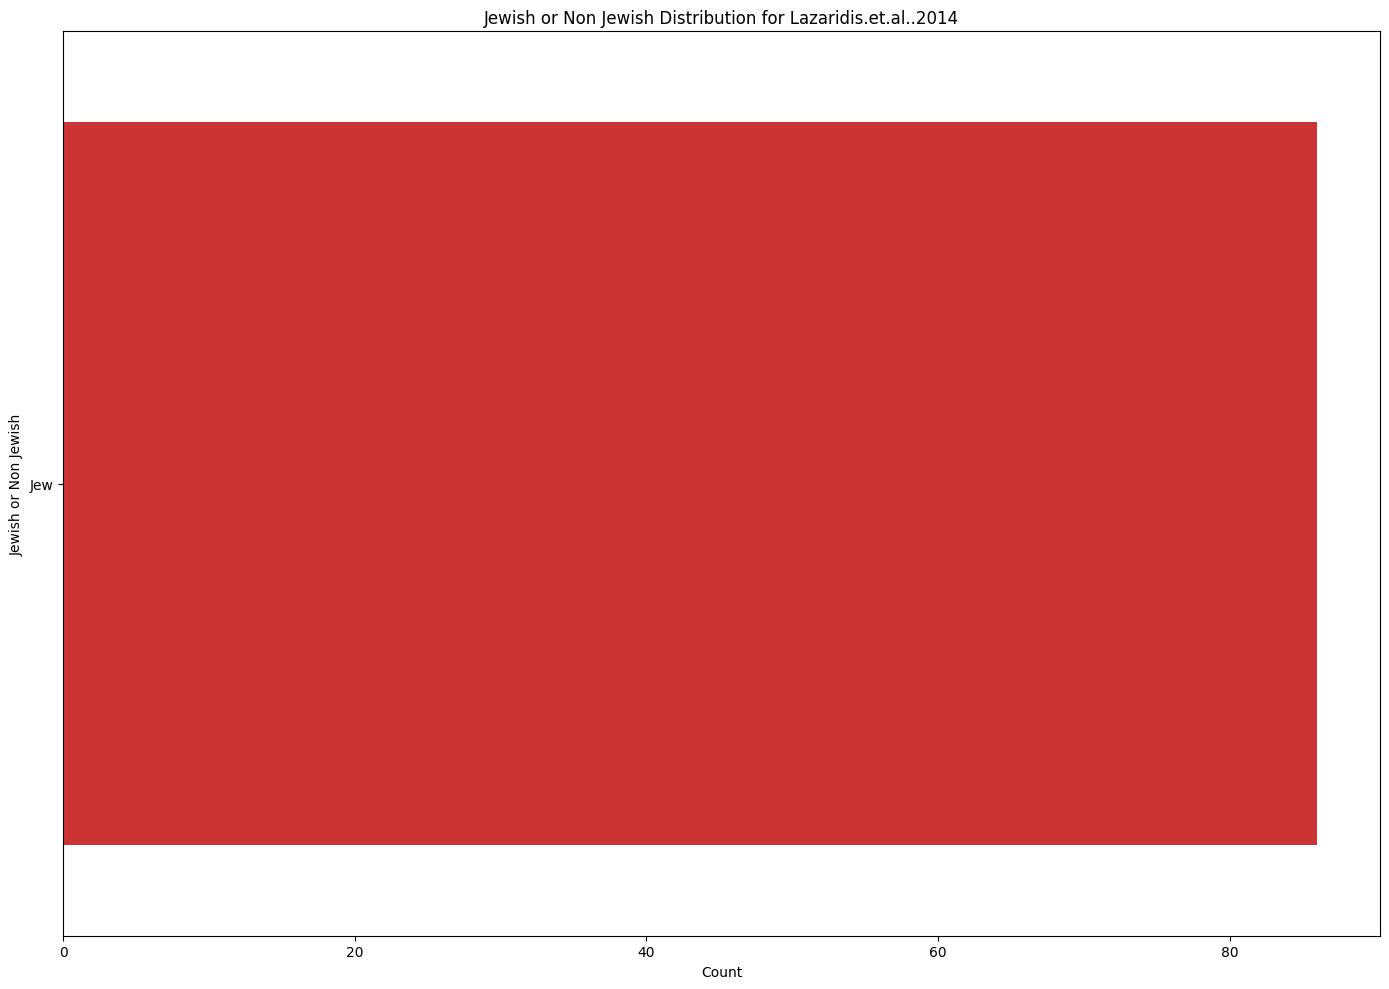

In [7]:
plotter.generate_study_tables(["Behar.et.al.2010", "Behar.et.al..2013", "Lazaridis.et.al..2014"])

In [ ]:
#Creation of initial meta file for Artzmon et al 2010/Campbell et al 2012
#The data was accomapanied with an encoded genetic ancestry as the fam phenotype

#!/bin/bash

POP_CODES="pop_codes.txt"
FAM_FILE="jhm.fam"
META_FILE="meta_file.txt"

# Create a dictionary from pop_codes.txt
declare -A POP_DICT
while read -r code ancestry; do
    POP_DICT["$code"]="$ancestry"
done < "$POP_CODES"

# Process the jhm fam file and create the meta file
awk '
BEGIN {
 
    while ((getline < "'"$POP_CODES"'") > 0) {
        POP_DICT[$1] = $2
    }
}
{
    # Extract IID and Phenotype from the fam file
    IID = $2
    Phenotype = $6

    # Map the phenotype to ancestry using the dictionary
    if (Phenotype in POP_DICT) {
        Ancestry = POP_DICT[Phenotype]
    } else {
        Ancestry = "Unknown"
    }

    # Print to the meta file
    print IID, Ancestry
}
' "$FAM_FILE" > "$META_FILE"

# Remove "JHM-" from the ancestry names in the meta file
sed -i 's/JHM-//g' "$META_FILE"

echo "Meta file created: $META_FILE"

#Information was then manually transferred to the larger meta file
    #Individuals who were "Hispano_non_Jews" and "LaronSyndrome_non_Jews" were excluded

Table for study: Atzmon.et.al.2010.Campbell.et.al.2012

Specifc_Region Tally:
           Specifc Region  Count
0               Greek.Jew     42
1            Moroccan.Jew     38
2               Iraqi.Jew     37
3             Italian.Jew     37
4              Libyan.Jew     37
5            Yemenite.Jew     36
6             Turkish.Jew     34
7           Ashkenazi.Jew     34
8            Tunisian.Jew     29
9             Iranian.Jew     28
10             Syrian.Jew     25
11           Algerian.Jew     24
12          Ethiopian.Jew     17
13             Indian.Jew     15
14           Georgian.Jew     14
15     Djerba.Tunisia.Jew     11
Total               Total    458

Refined_Region Tally:
           Refined Region  Count
0               Greek.Jew     42
1            Moroccan.Jew     38
2               Iraqi.Jew     37
3             Italian.Jew     37
4              Libyan.Jew     37
5            Yemenite.Jew     36
6             Turkish.Jew     34
7           Ashkenazi.Jew     34
8       

/tmp/ipykernel_3692059/2651254208.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


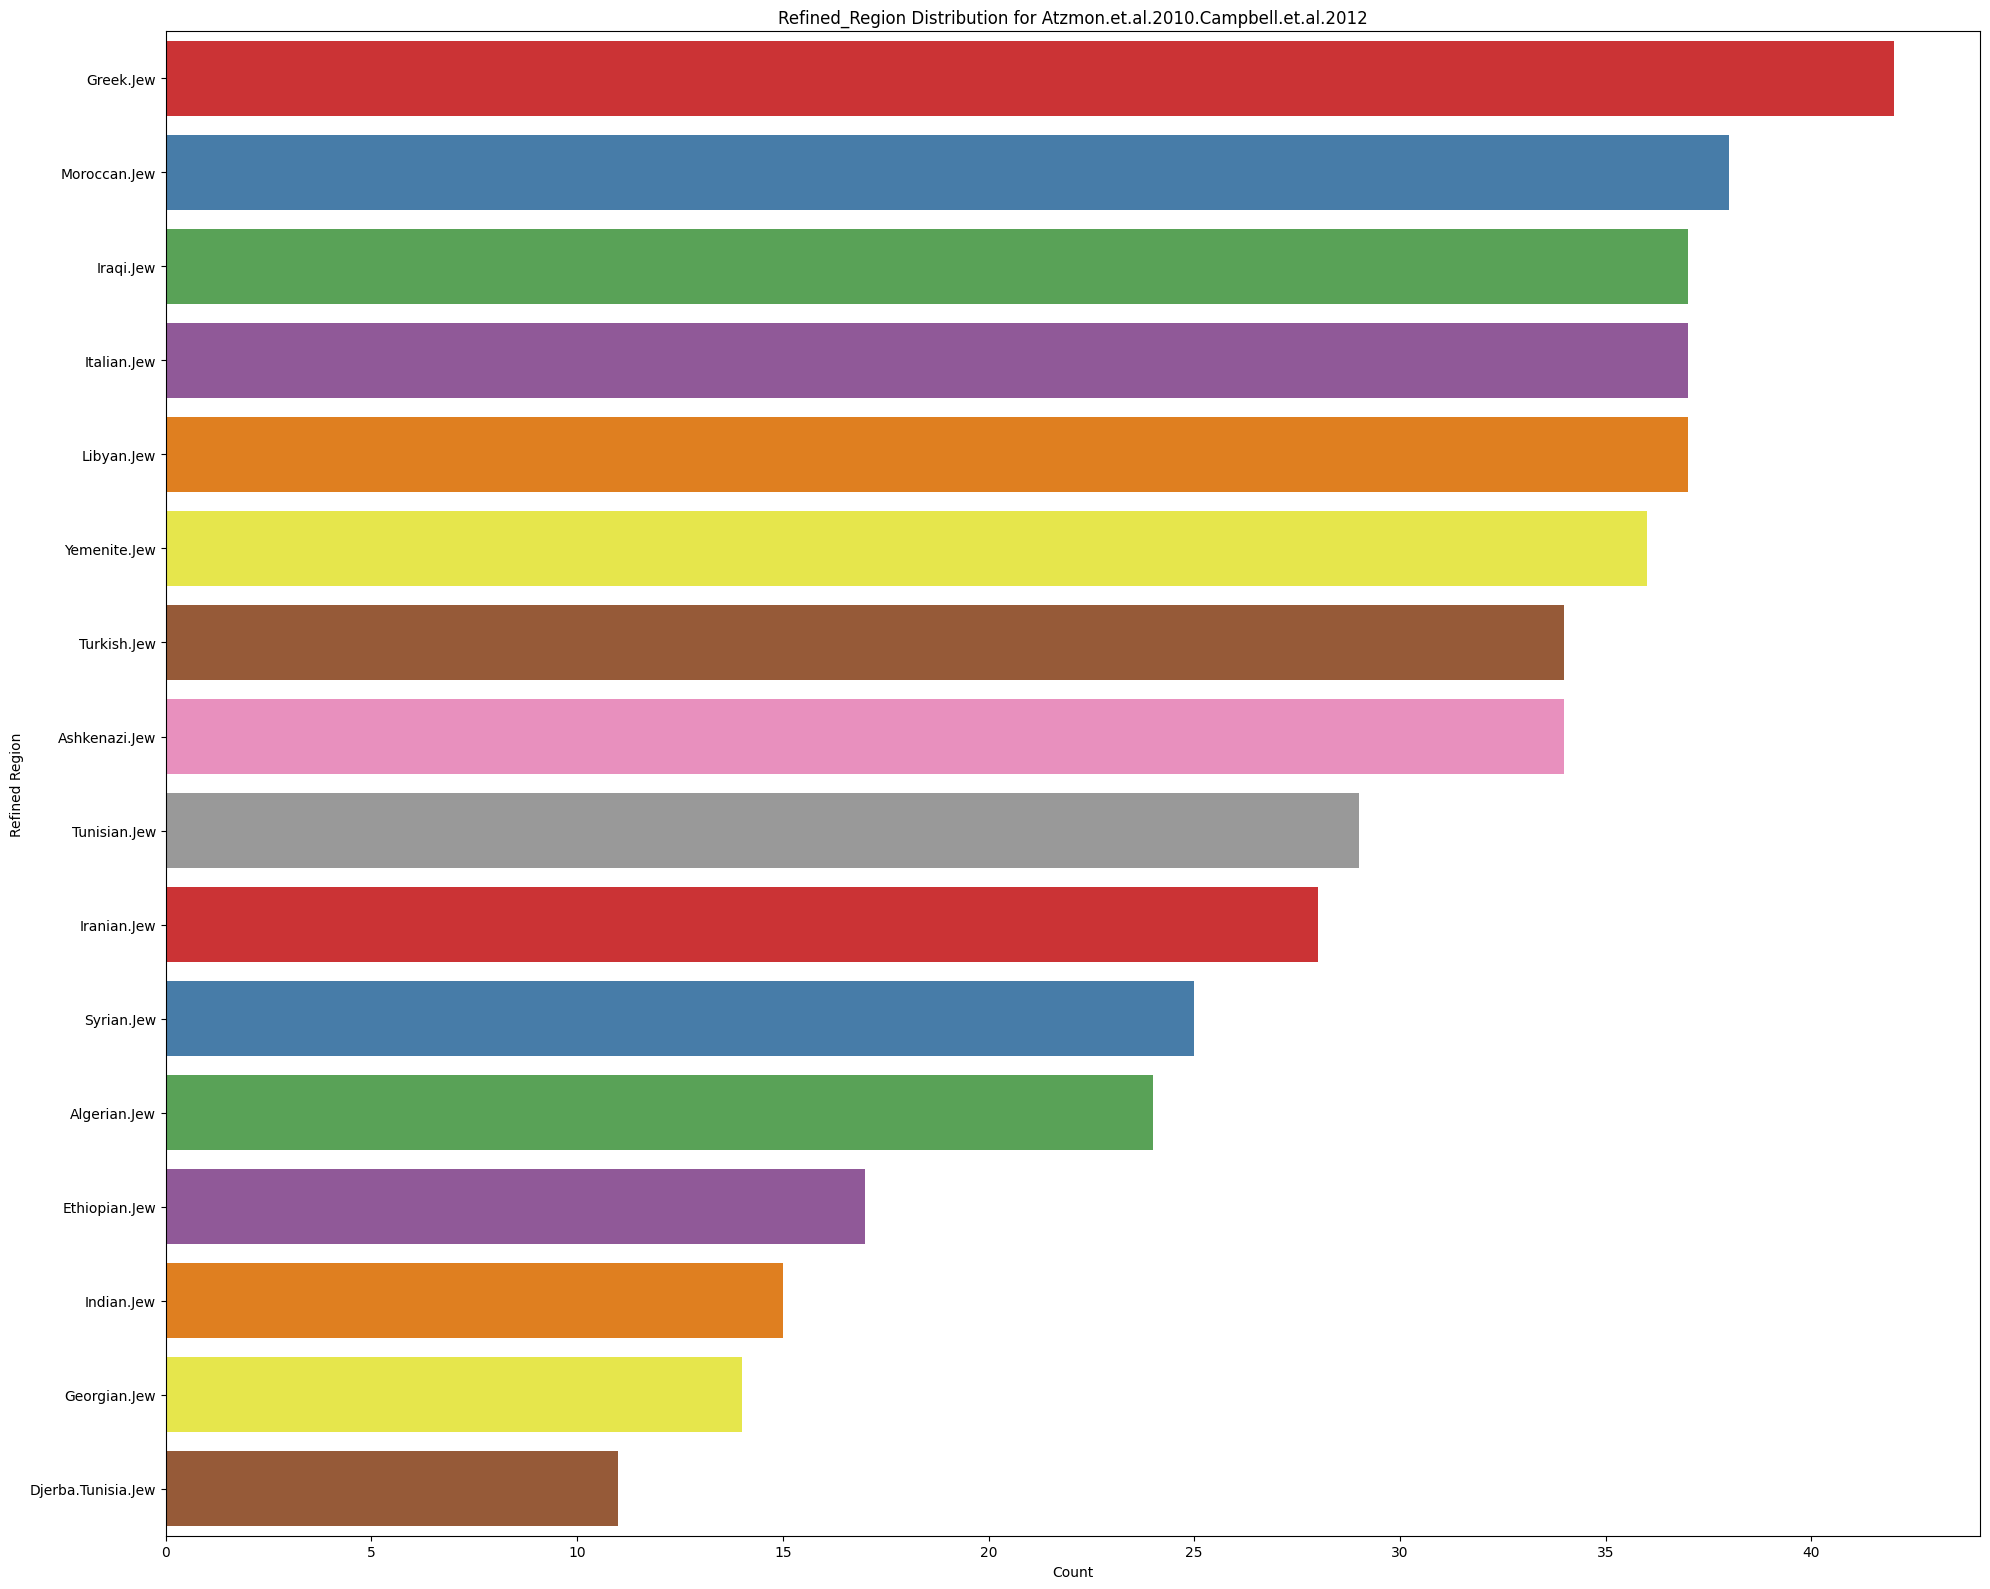

/tmp/ipykernel_3692059/2651254208.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


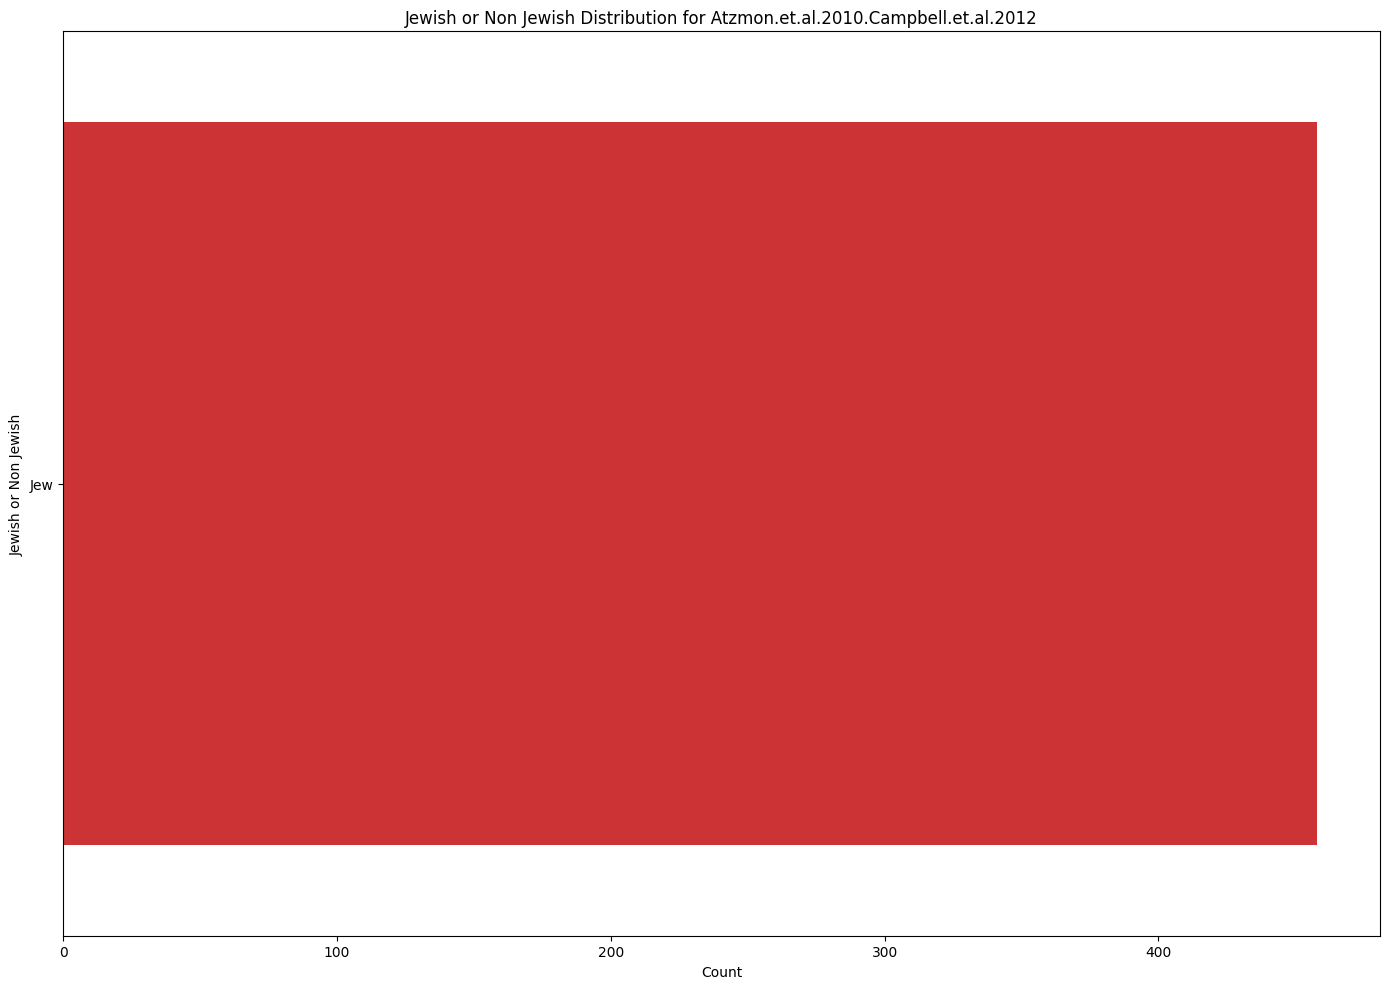

In [3]:
plotter.generate_study_tables(["Atzmon.et.al.2010.Campbell.et.al.2012"])

In [ ]:
# Creation of intial Gladstein meta file entries
# Gladstein's data was accompanied with a key text file which was altered to reflect origin as opposed to geograghy (e.g., changing The Netherlands to Dutch)

#!/bin/bash


GLAD_ID_KEY_FILE="Glad_ID_Key.txt"
FAM_FILE="AJ_hg18.fam"
OUTPUT_FILE="meta_glad.txt"

# Run the awk script
awk -v glad_id_key_file="$GLAD_ID_KEY_FILE" -v output_file="$OUTPUT_FILE" '
BEGIN {

    while ((getline < glad_id_key_file) > 0) {
        if (/ - /) {  # Process only lines with " - "
            split($0, parts, " - ");
            code = parts[1];
            region = parts[2];
            glad_id_key[code] = region;  # Store code-region mapping
        }
    }
    close(glad_id_key_file);

 
    output_header = "FAM_ID Region1/Region2";
    print output_header > output_file;
}

# Process the .fam file
{
    
    fam_id = $1;

    # Split the ID into parts using "_"
    split(fam_id, parts, "_");

    # Extract the 2nd and 3rd parts as codes
    code1 = parts[2];
    code2 = parts[3];

    # Lookup region names for each code
    region1 = (code1 in glad_id_key) ? glad_id_key[code1] : "NA";
    region2 = (code2 in glad_id_key) ? glad_id_key[code2] : "NA";


    combined_region = region1 "/" region2 "_Jew";


    print fam_id, combined_region >> output_file;
}

END {
    close(output_file);
}
' "$FAM_FILE"

#Information was then manually transferred to the larger meta file
    #An additional column named "Refined Region" was created that largely copied the original description column, with the exception of Gladstein where individuals of mixed heritage were consolidated into broader categories with in europe (e.g., Polish/German_Jew -> Western_and_Eastern_European_Jew )

Table for study: Gladstein.et.al..2018

Specifc_Region Tally:
                   Specifc Region  Count
0                      Polish.Jew     29
1            Ukrainian/Polish.Jew     23
2                   Ukrainian.Jew     21
3           Lithuanian/Polish.Jew     17
4          Belorussian/Polish.Jew     14
5        Lithuanian/Ukrainian.Jew     14
6              Russian/Polish.Jew     12
7      Lithuanian/Belorussian.Jew     12
8                 Belorussian.Jew     12
9                      German.Jew     11
10             Polish/Romania.Jew     11
11                 Lithuanian.Jew     11
12                    Russian.Jew     11
13      Belorussian/Ukrainian.Jew     11
14           Hungarian/Polish.Jew      9
15              Polish/German.Jew      6
16         Lithuanian/Russian.Jew      6
17          Ukrainian/Romania.Jew      5
18          Ukrainian/Russian.Jew      5
19          Ukrainian/Latvian.Jew      5
20        Belorussian/Romania.Jew      4
21         Lithuanian/Latvian.Jew   

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


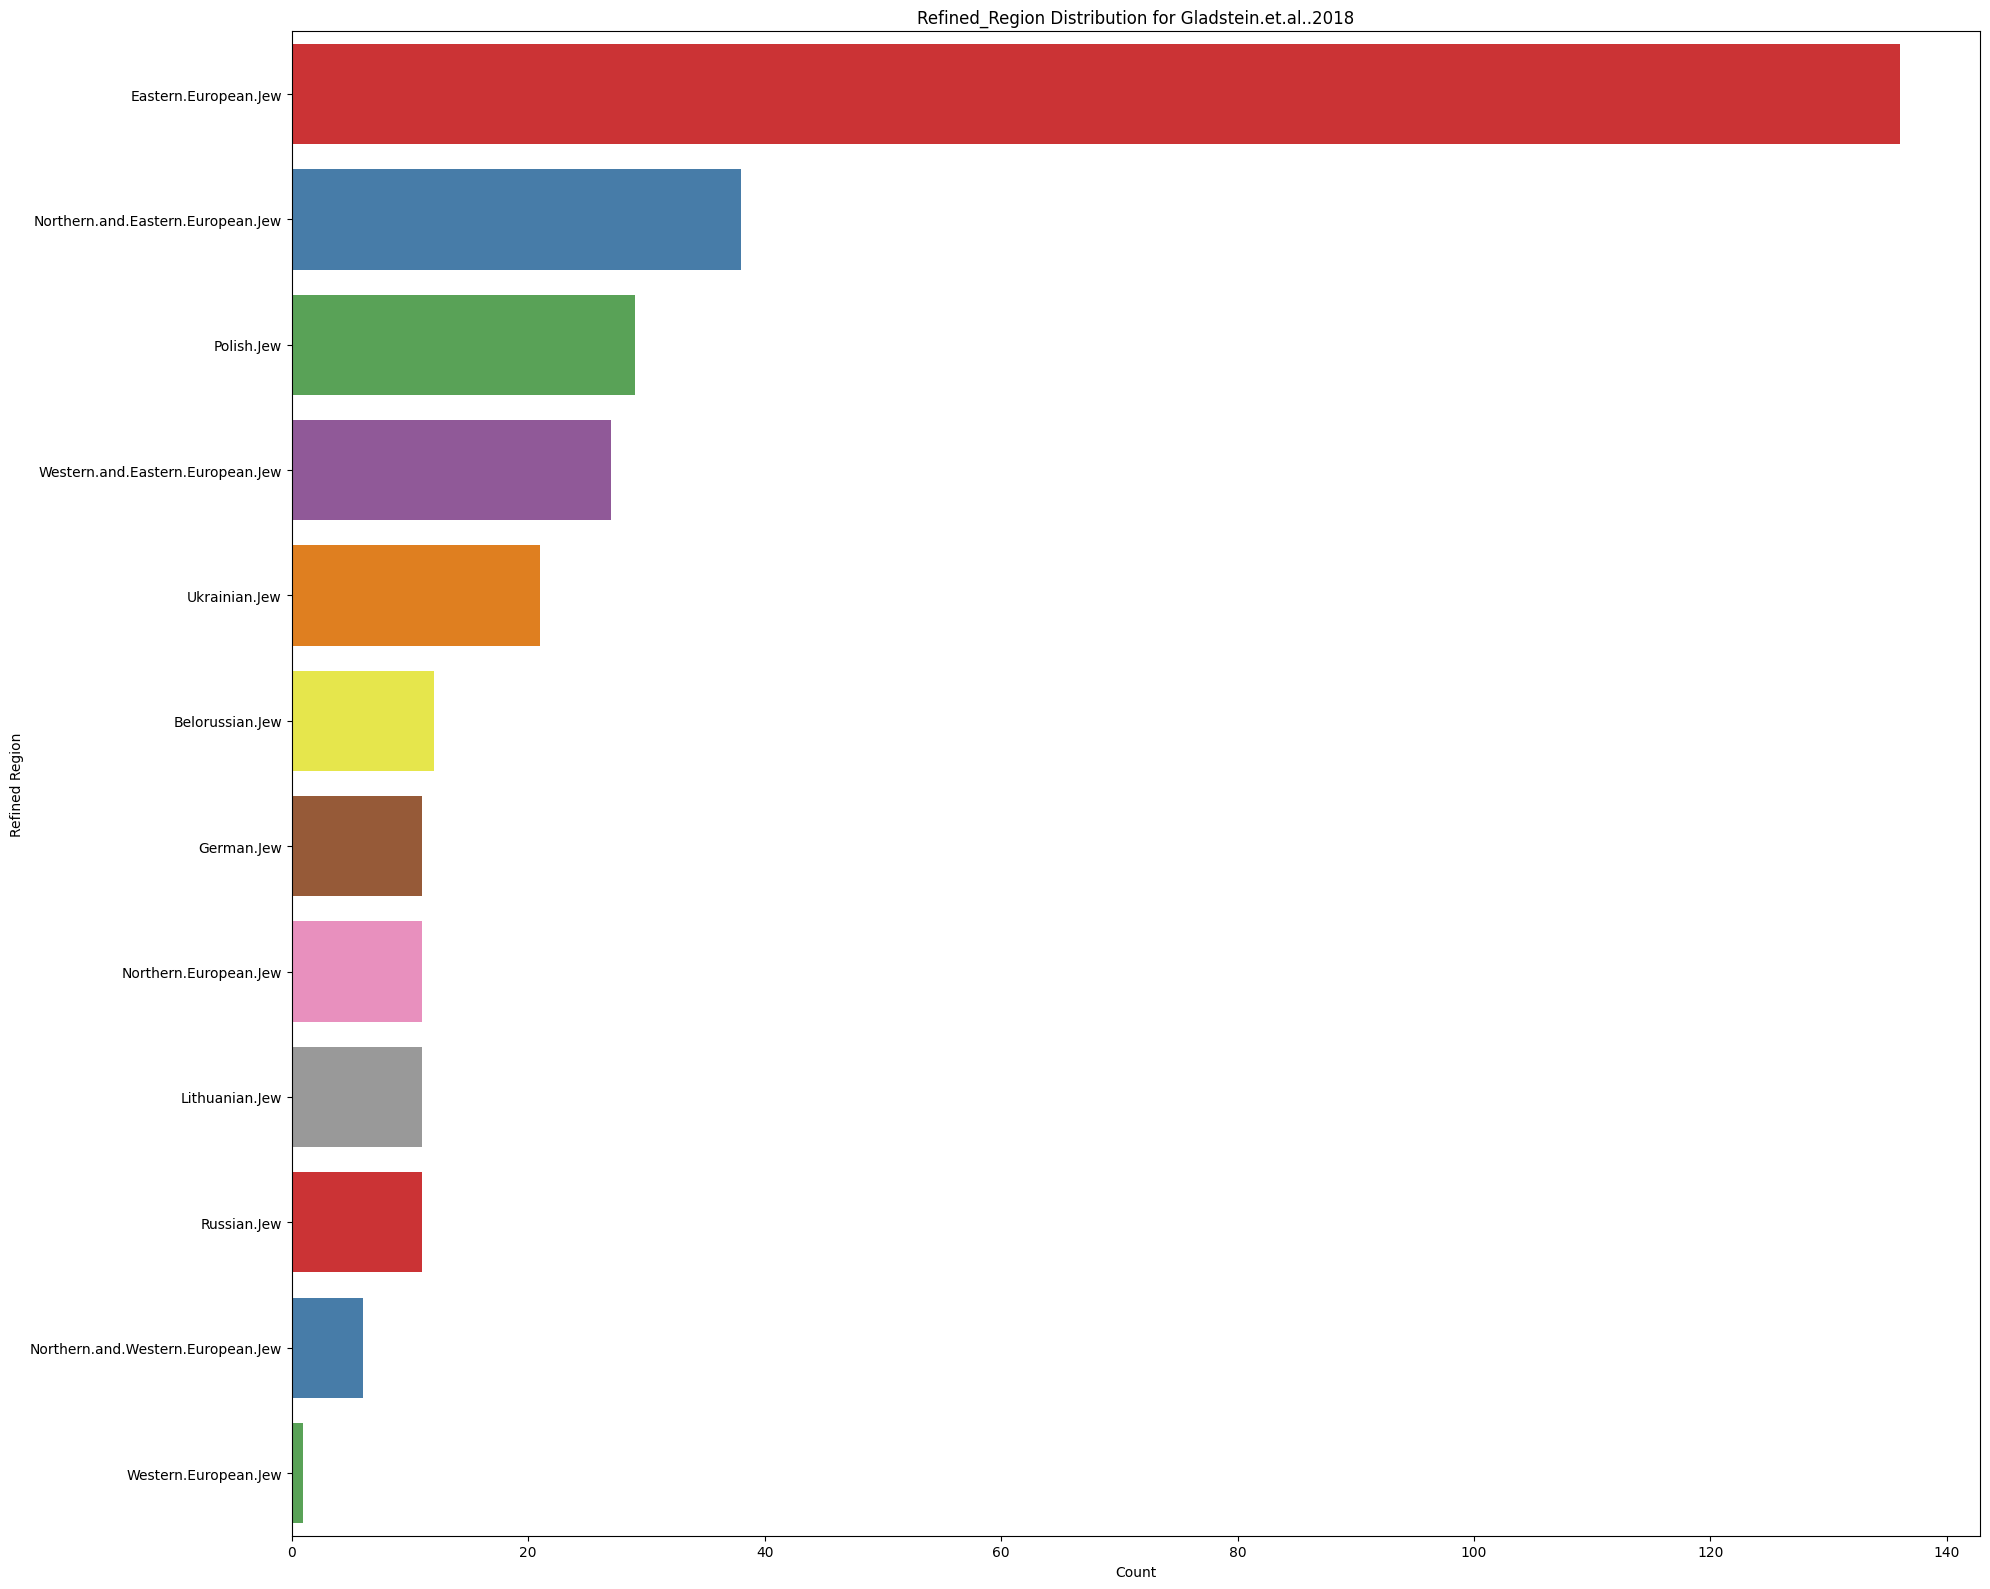

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


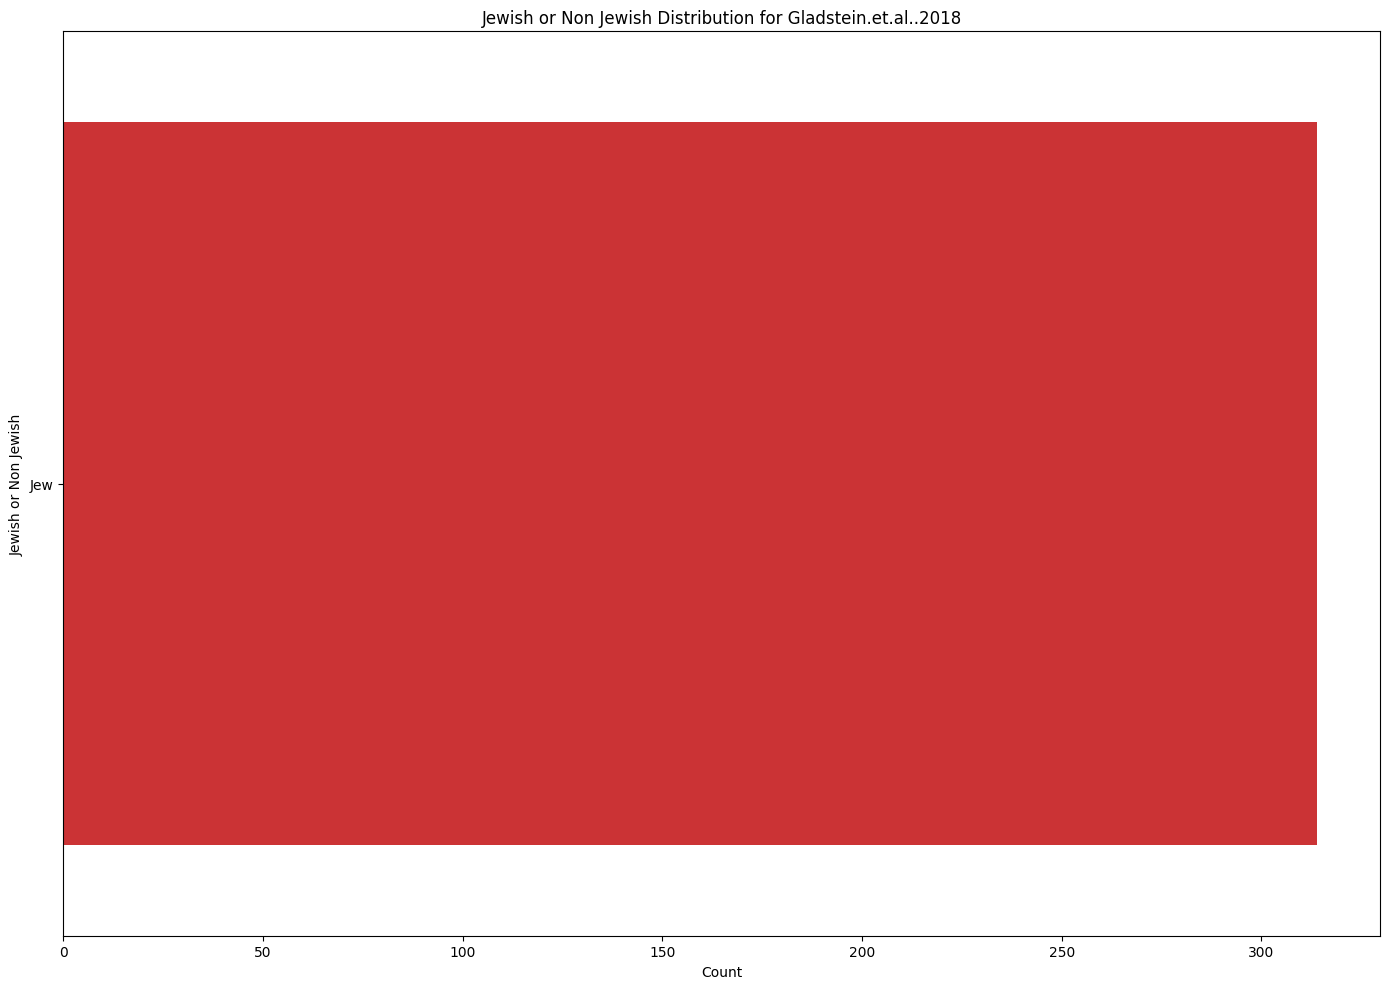

In [8]:
plotter.generate_study_tables(["Gladstein.et.al..2018"])

In [ ]:
# Kopelmen et al., 2020
# Data came with a file describing the newly genotyped data and the coding system that described their ancestry

# Input file
input_file="New_samples.txt"

# Output file
output_file="just_kopelman_meta.txt"

# Check if the input file exists
if [[ ! -f "$input_file" ]]; then
    echo "File $input_file does not exist."
    exit 1
fi

# Clear the output file if it already exists
> "$output_file"

# Read the file line by line
while IFS=' ' read -r first_col second_col third_col; do
    # Format the output as "Pop_secondcolumn_firstcolumn_thirdcolumn" and append to the output file
    echo "Pop_${second_col}_${first_col}    ${third_col}" >> "$output_file"
done < "$input_file"

echo "Output saved to $output_file"
#Information was then manually transferred to the larger meta file

Table for study: Kopelman.et.al.,2020

Specifc_Region Tally:
        Specifc Region  Count
0               Europe    207
1          Middle.East     64
2      Africa.Northern     52
3               Arabia     26
4         Central.Asia     25
5             Caucasus     21
6               Africa     19
7           South.Asia     15
Total            Total    429

Refined_Region Tally:
        Refined Region  Count
0         Tunisian.Jew     29
1         Yemenite.Jew     26
2          Russian.Jew     26
3            Iraqi.Jew     25
4         Moroccan.Jew     24
5         Georgian.Jew     21
6        Hungarian.Jew     21
7           Polish.Jew     20
8          Iranian.Jew     20
9        Ethiopian.Jew     19
10       Bulgarian.Jew     19
11          Libyan.Jew     19
12       Ukrainian.Jew     18
13        Romanian.Jew     17
14               Tajik     16
15      Lithuanian.Jew     16
16         Turkish.Jew     14
17          Cochin.Jew     14
18          German.Jew     12
19           Cze

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


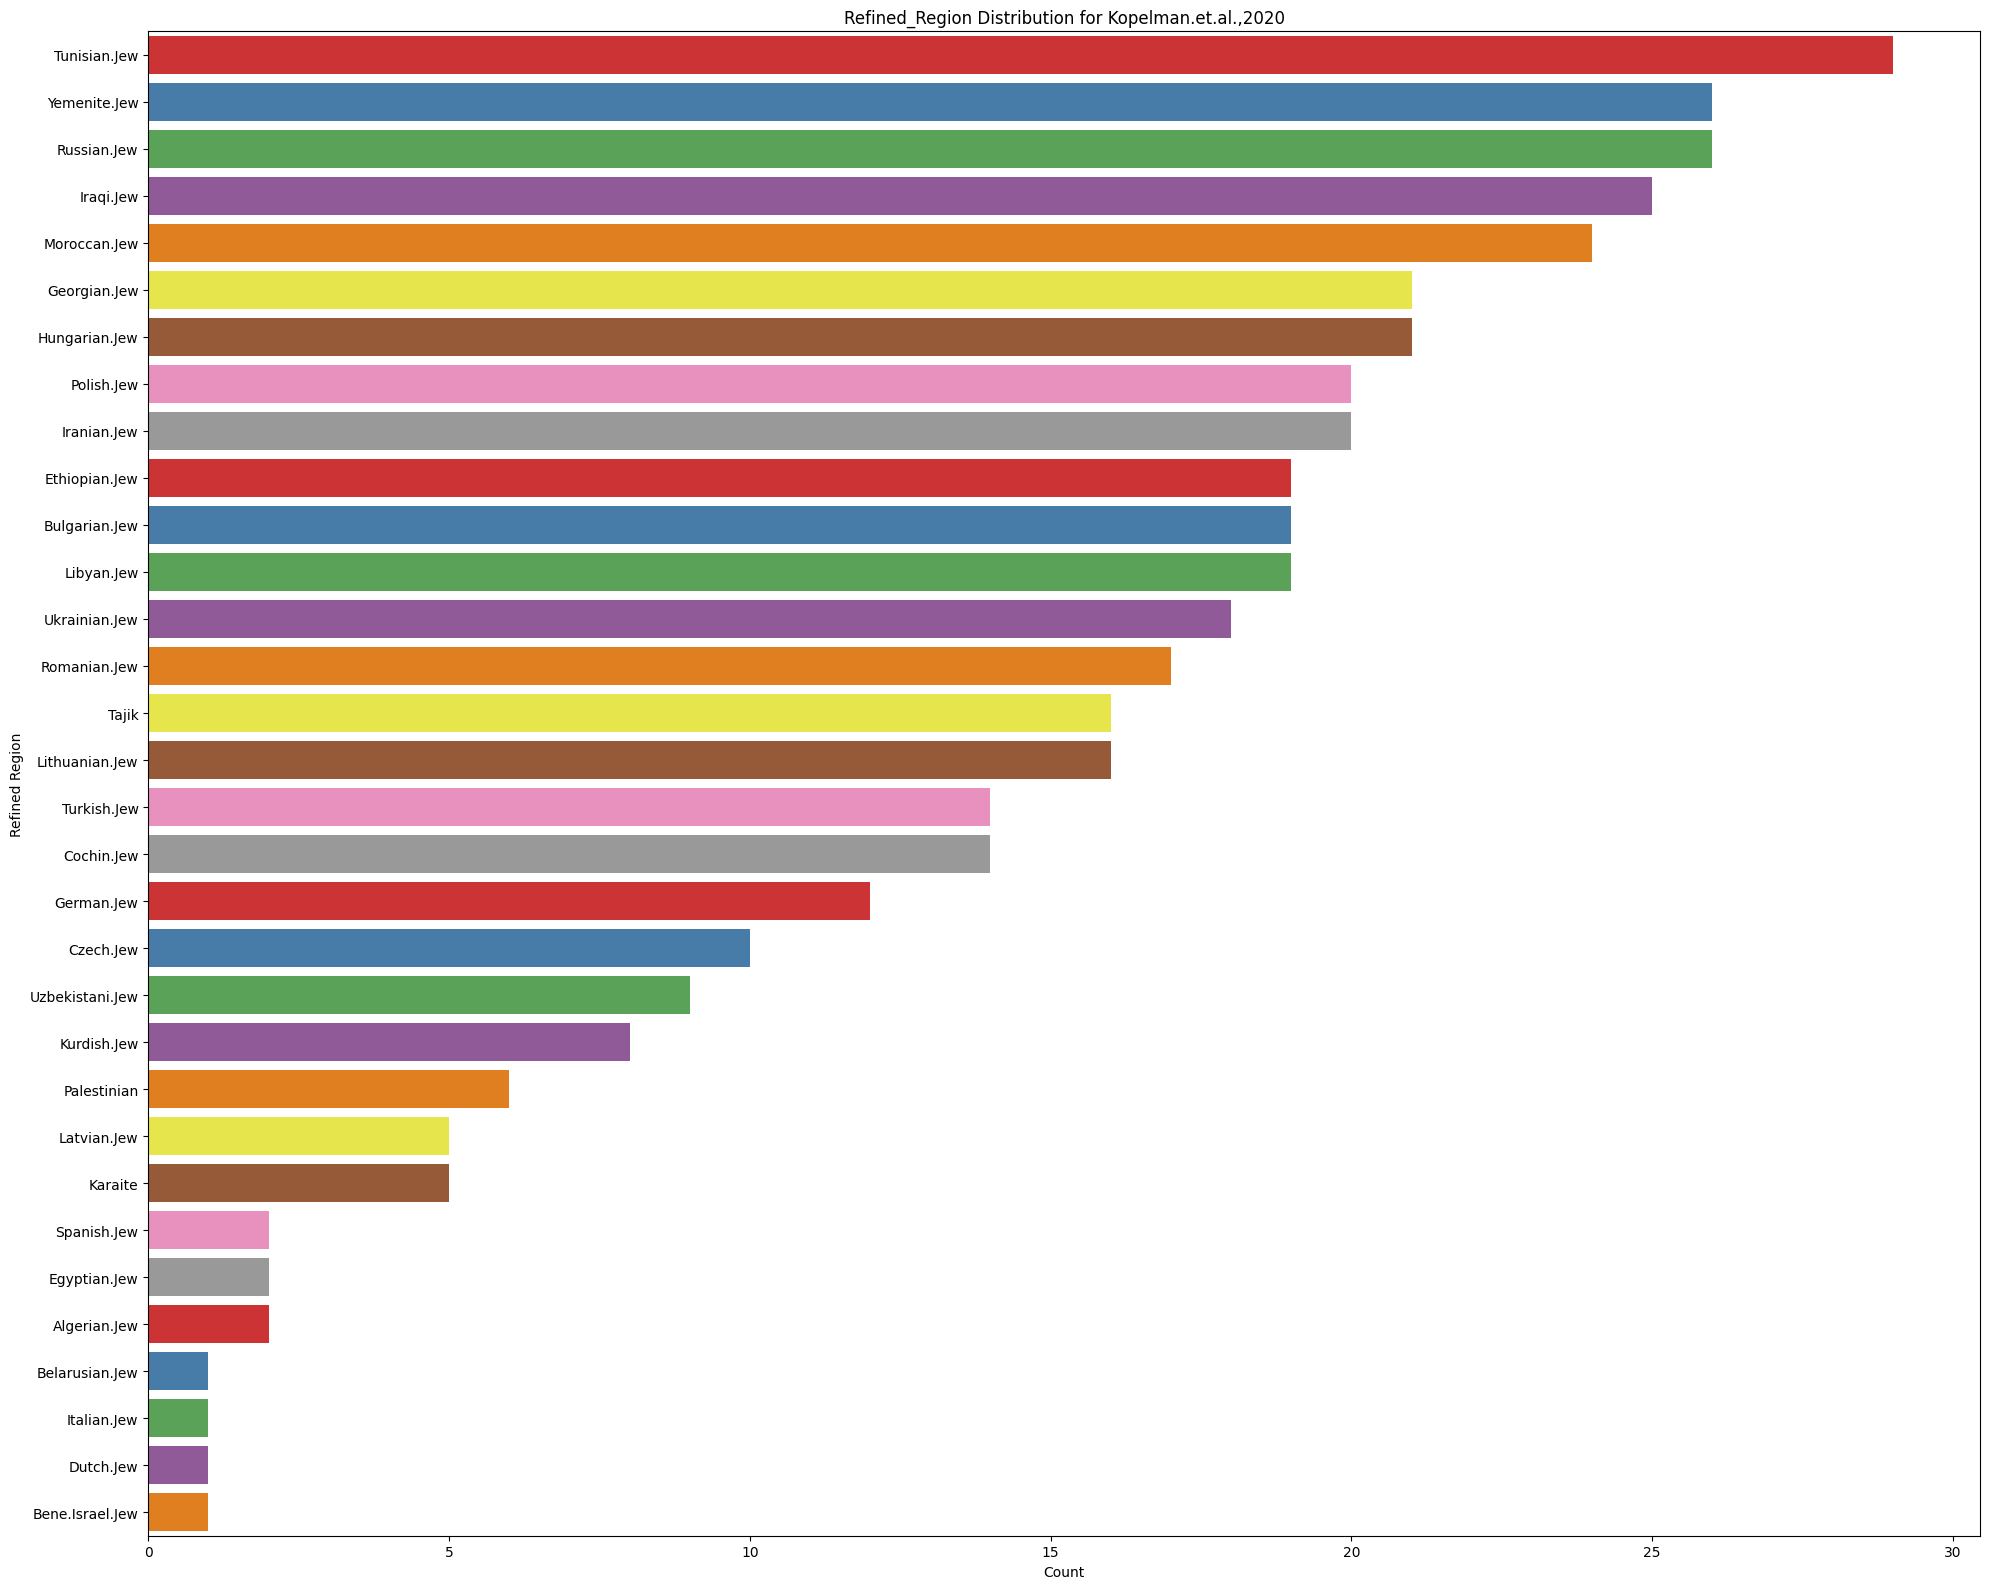

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


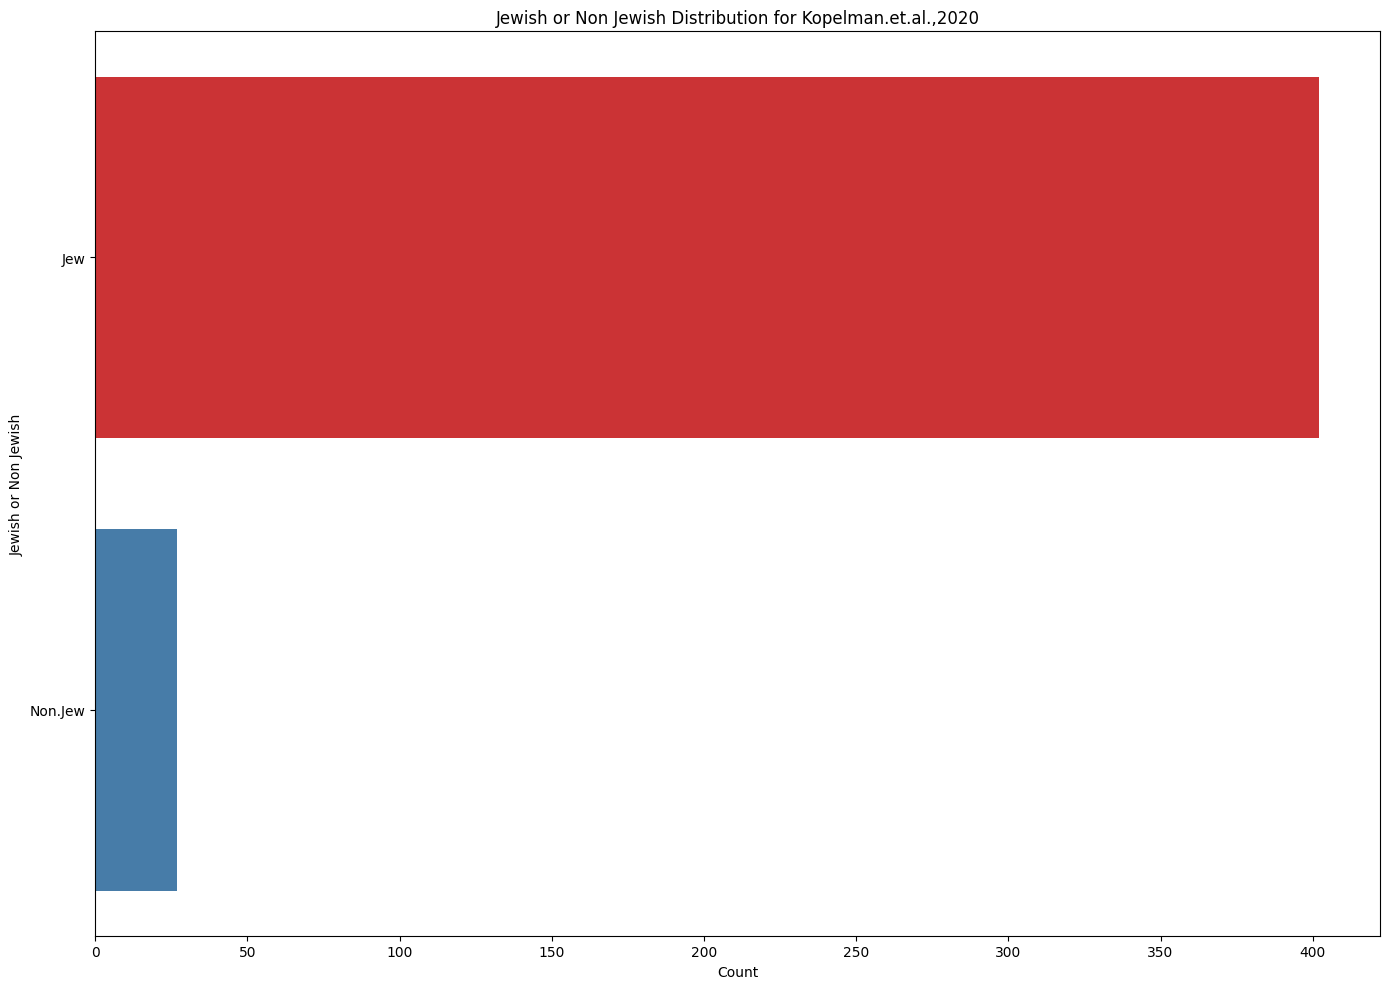

In [9]:
plotter.generate_study_tables("Kopelman.et.al.,2020")

Table for all studies:

Specifc_Region Tally:
                   Specifc Region  Count
0                             AFR   1003
1                             EAS    826
2                             CSA    790
3                             EUR    788
4                   Ashkenazi.Jew    695
5                             AMR    552
6                   Baltimore.Jew    471
7                          Europe    207
8                             MID    162
9                     Middle.East     64
10                      Iraqi.Jew     60
11                    Turkish.Jew     53
12                   Moroccan.Jew     53
13                     Libyan.Jew     52
14                Africa.Northern     52
15                   Yemenite.Jew     49
16                    Italian.Jew     47
17                    Iranian.Jew     47
18                   Tunisian.Jew     42
19                      Greek.Jew     42
20                     Polish.Jew     40
21                  Ethiopian.Jew     39
22         

/tmp/ipykernel_3692059/3462334064.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Refined Region', data=refined_region_counts, palette='Set1')


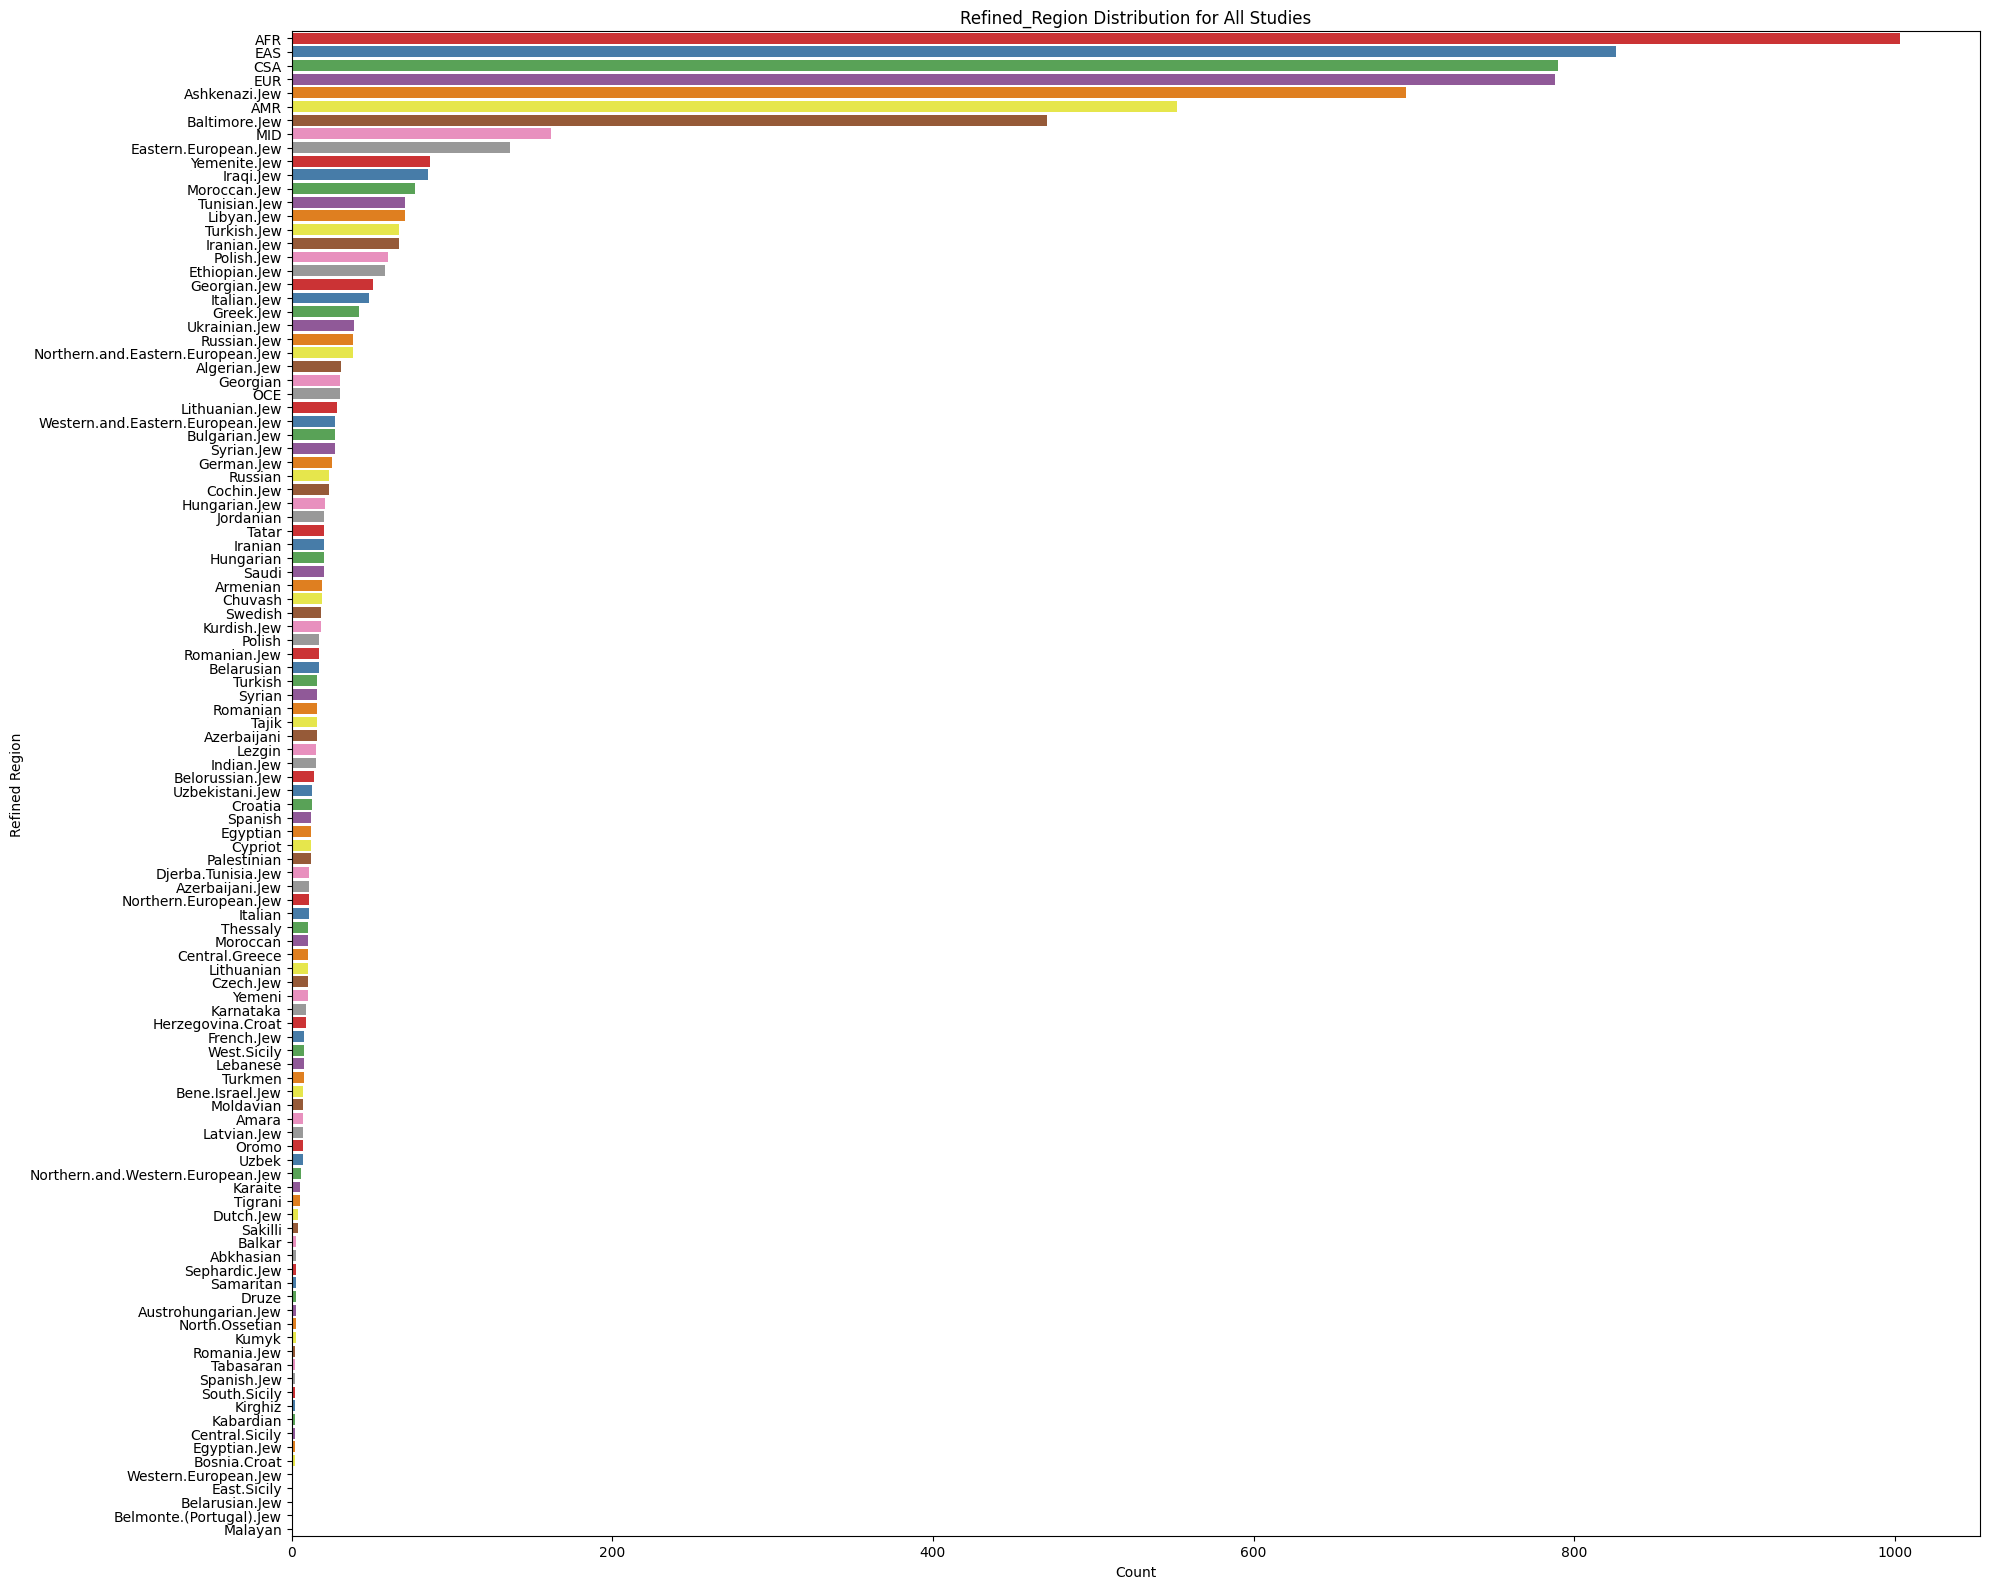

/tmp/ipykernel_3692059/3462334064.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Jew or NonJewish', data=jewish_nonjewish_counts, palette='Set1')


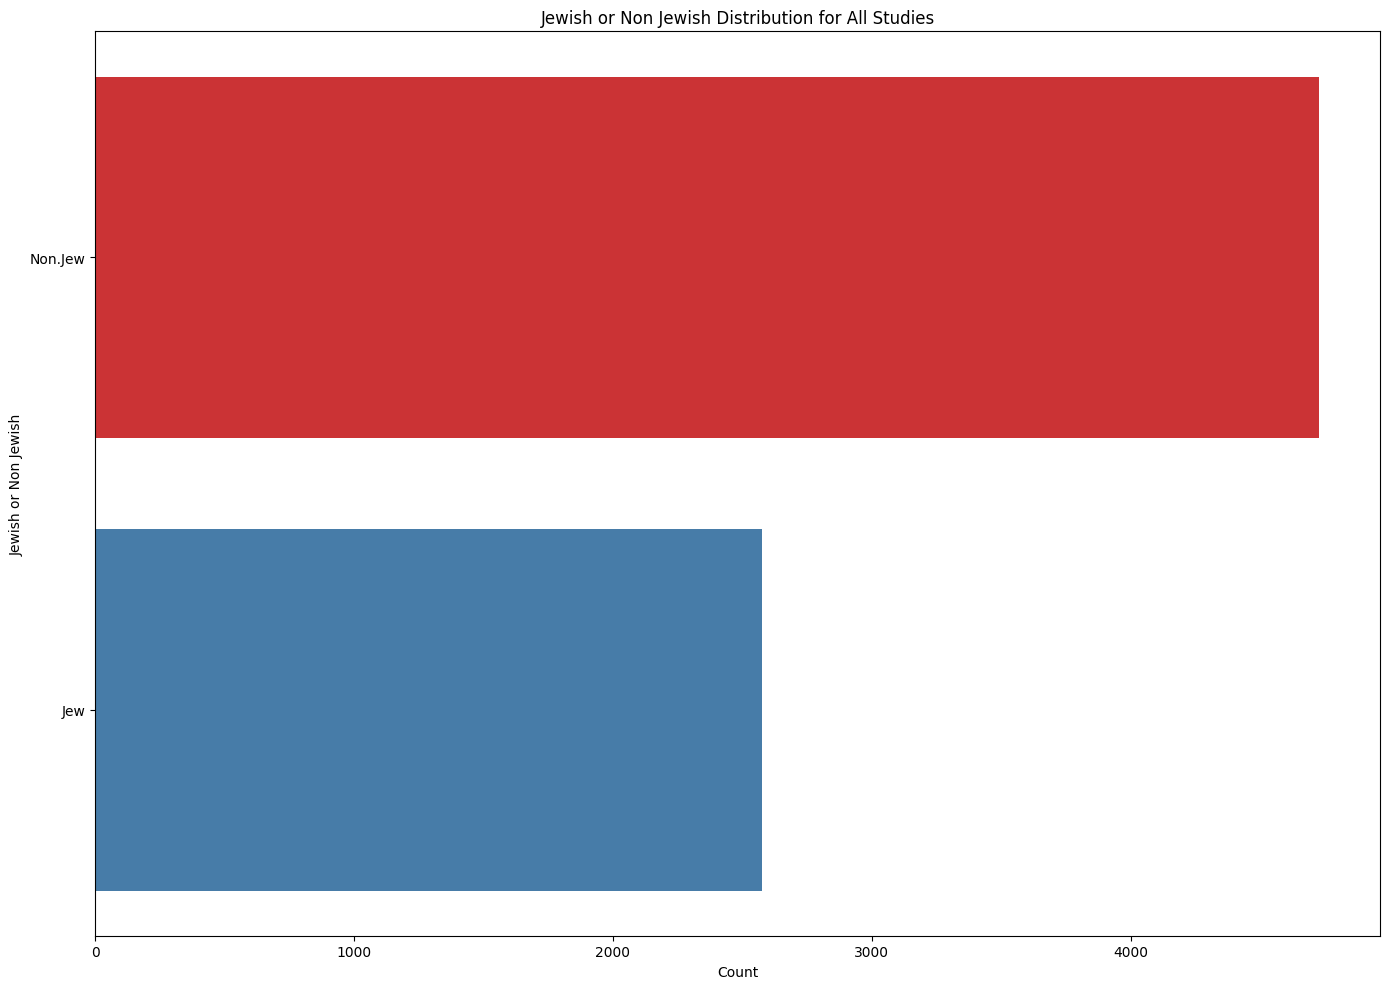

In [10]:
plotter.generate_study_tables("all")